## Kalashnik et Kalashnik 2011 - Tests

In [1]:
# General
# import glob
import os.path
# import warnings
# warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import copy

# Arrays & Displays
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# # from matplotlib.colors import Normalize
# # from matplotlib.colors import ListedColormap
# # import matplotlib.cm as cm
import pandas as pd

# # PyTorch
# import torch
# import torch.nn as nn
# from torch.autograd import Variable              # Convert arrays to tensors
# from torch.utils.data import Dataset, DataLoader # Create a Dataset class to combine with DataLoader (= mini batches selection)
# import pytorch_lightning as pl

# Data treatment
# import dask as da
# from dask.diagnostics import ProgressBar
# import zarr
# from scipy.interpolate import griddata
from datetime import datetime
from sklearn.linear_model import LinearRegression

# Custom
import functions as f
import dataUtils as du

# Statistics
from sklearn import linear_model, neighbors
from pykalman import KalmanFilter

# Default parameters
mpl.rcParams.update({'font.size': 18})
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'

PATHS = {
    'sav_dir': '/home/arthur/results/TCsLifeMonitFromObs/06_kalashnik_2011_v01/'
}

In [2]:
def vm(t, lbda=1.5):
    num = np.exp(-t) - np.exp((1 - lbda) * t)
    den = lbda - 2
    return num / den

def rm(t):
    return np.exp(-t)

In [3]:
# lbda = 1.5 # lambda parameter
# ts   = np.linspace(0, 10, 1000)

# for lbda in [0.9, 1.1, 1.5, 1.9, 2.1]:
#     plt.title('Lambda = {}'.format(lbda), weight='bold')
#     plt.plot(vm(ts, lbda), c='tab:red', label='Vmax')
#     plt.plot(rm(ts),       c='k',       label='Rmax')
#     plt.legend()
#     plt.grid()
#     plt.xlabel('time unit');plt.ylabel('Vm and Rm units of initial values')
#     plt.show()

/tmp/ipykernel_7193/2638892111.py:4: RuntimeWarning: invalid value encountered in divide
  return num / den


Text(0, 0.5, 'Vm and Rm units of initial values')

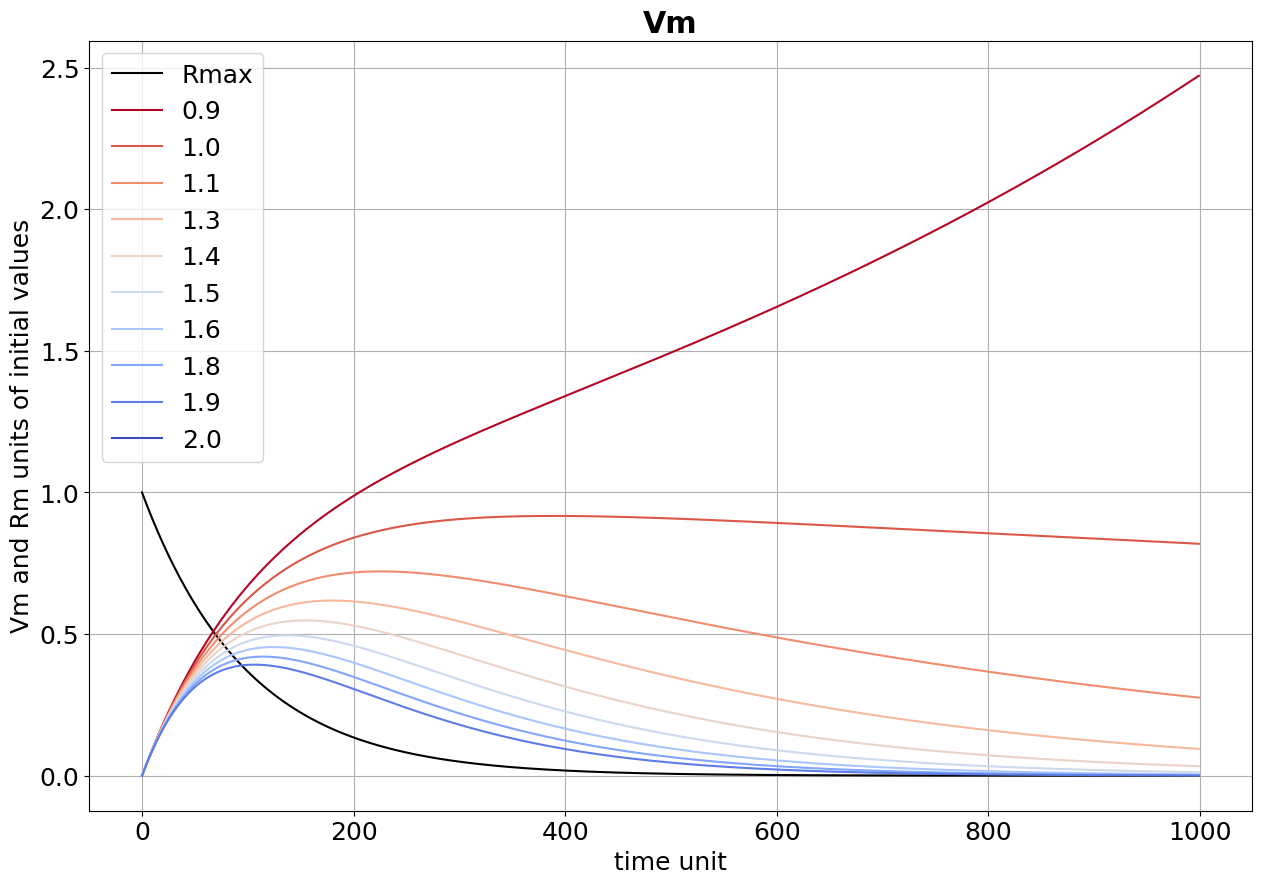

In [4]:
ts     = np.linspace(0, 10, 1000)
lbdas  = np.linspace(0.9, 2, 10)
colors = mpl.cm.coolwarm_r(np.linspace(0, 1, len(lbdas)))

plt.title('Vm', weight='bold')
plt.plot(rm(ts),       c='k',       label='Rmax')

for i, lbda in enumerate(lbdas):
    plt.plot(vm(ts, lbda), label='{:.1f}'.format(lbda), c=colors[i])
plt.legend()
plt.grid()
plt.xlabel('time unit');plt.ylabel('Vm and Rm units of initial values')

/tmp/ipykernel_7193/2638892111.py:4: RuntimeWarning: invalid value encountered in divide
  return num / den


Text(0, 0.5, 'Mm and Rm units of initial values')

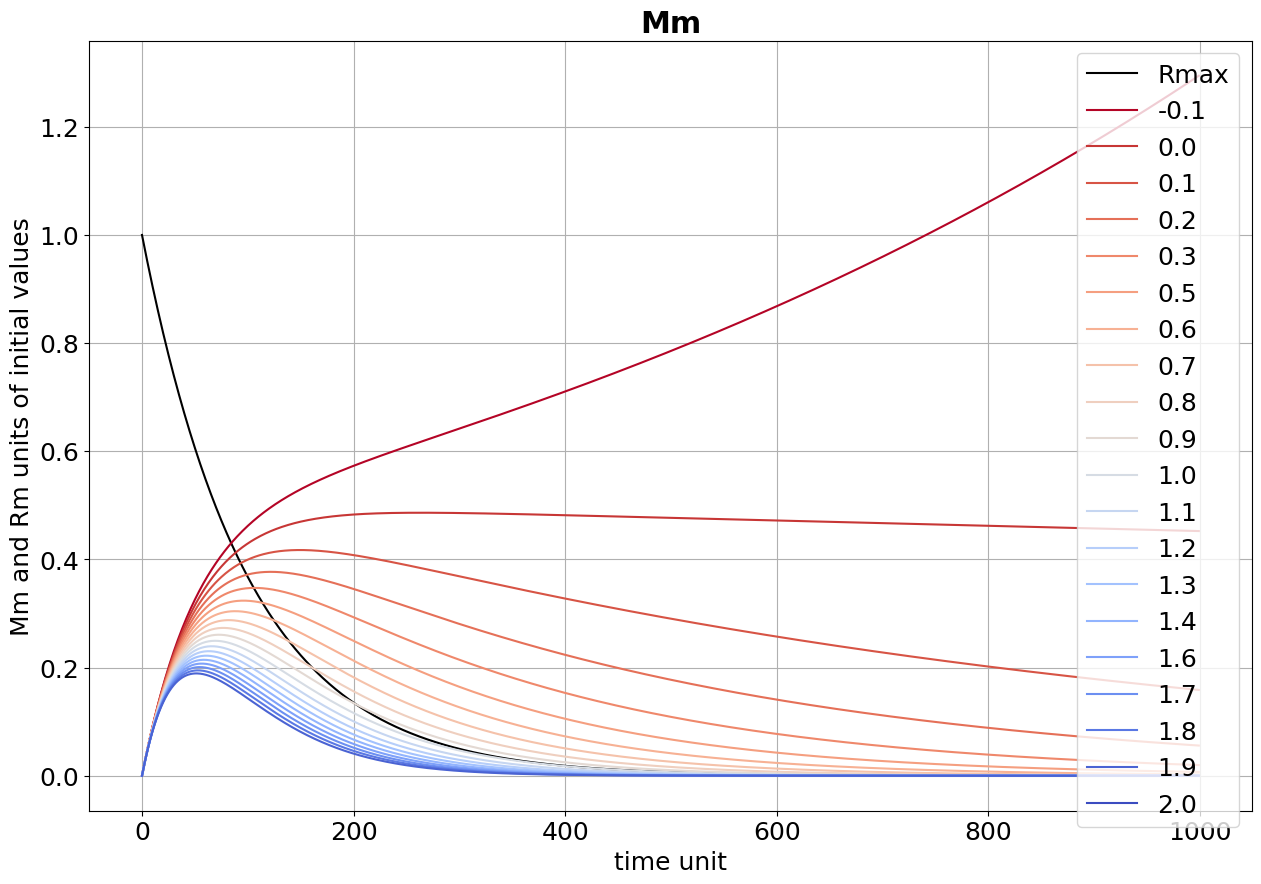

In [5]:
ts     = np.linspace(0, 10, 1000)
lbdas  = np.linspace(-0.1, 2, 20)
colors = mpl.cm.coolwarm_r(np.linspace(0, 1, len(lbdas)))

plt.title('Mm', weight='bold')
plt.plot(rm(ts),       c='k',       label='Rmax')

for i, lbda in enumerate(lbdas):
    plt.plot(rm(ts) * vm(ts, lbda), label='{:.1f}'.format(lbda), c=colors[i])
plt.legend()
plt.grid()
plt.xlabel('time unit');plt.ylabel('Mm and Rm units of initial values')

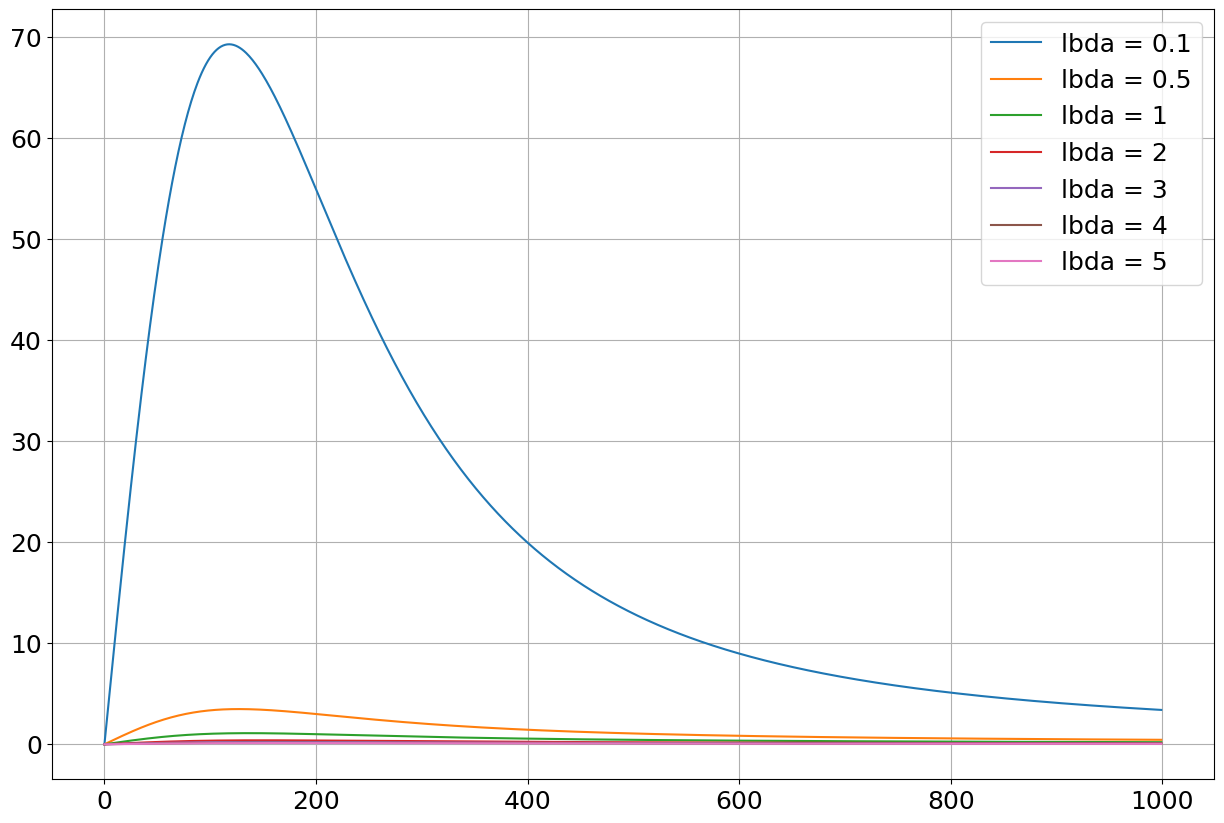

In [6]:
def vm(r, lbda):
    '''Steady-state solution (eq. 34)'''
    return r / (lbda * (1 + r ** 2)) * ((2 / (lbda * (1 + r ** 2))) + 1)

rs = np.linspace(0, 5, 1000)

for lbda in [0.1, 0.5, 1, 2, 3, 4, 5]:
    plt.plot(vm(rs, lbda=lbda), label='lbda = {}'.format(lbda))
plt.grid();plt.legend()

In [7]:
def vm2(t, lbda=1.5, tau=1.):
    num = np.exp(-t / tau) - np.exp((1 / tau - lbda) * t)
    den = lbda - (2 / tau)
    return num / den

def rm2(t, tau=1.):
    return np.exp(-t / tau)

/tmp/ipykernel_7193/1653025495.py:4: RuntimeWarning: invalid value encountered in divide
  return num / den


Text(0, 0.5, 'Vm and Rm units of initial values')

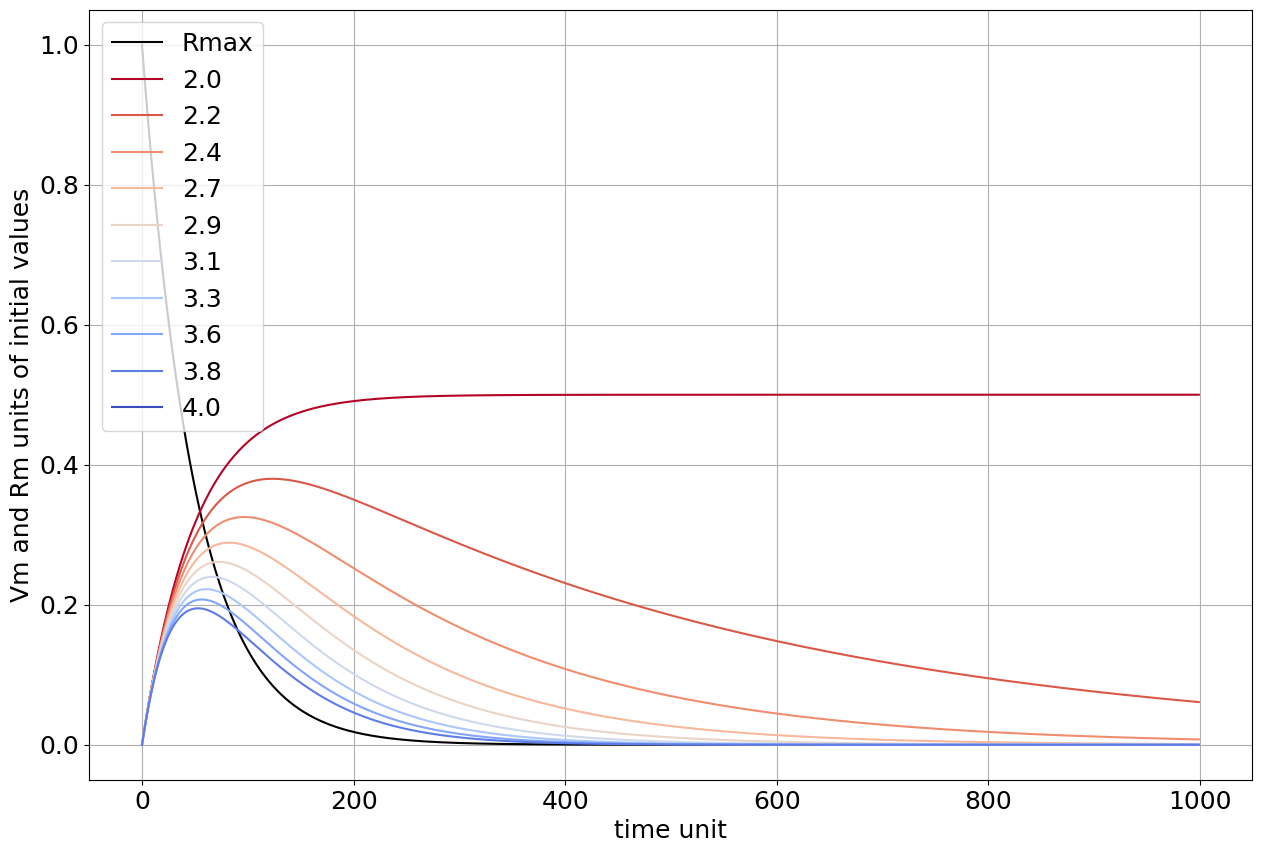

In [8]:
tau    = 0.5
ts     = np.linspace(0, 10, 1000)
lbdas  = np.linspace(1, 2, 10) * (1 / tau)
colors = mpl.cm.coolwarm_r(np.linspace(0, 1, len(lbdas)))

plt.plot(rm2(ts, tau=tau),       c='k',       label='Rmax')
for i, lbda in enumerate(lbdas):
    plt.plot(vm2(ts, lbda, tau=tau), label='{:.1f}'.format(lbda), c=colors[i])
plt.legend()
plt.grid()
plt.xlabel('time unit');plt.ylabel('Vm and Rm units of initial values')

In [9]:
def vm3(t, lbda=1.5, tau=1.):
    num = np.exp(tau - t) - np.exp((1 / lbda) * (t - tau))
    den = lbda - 2
    return num / den

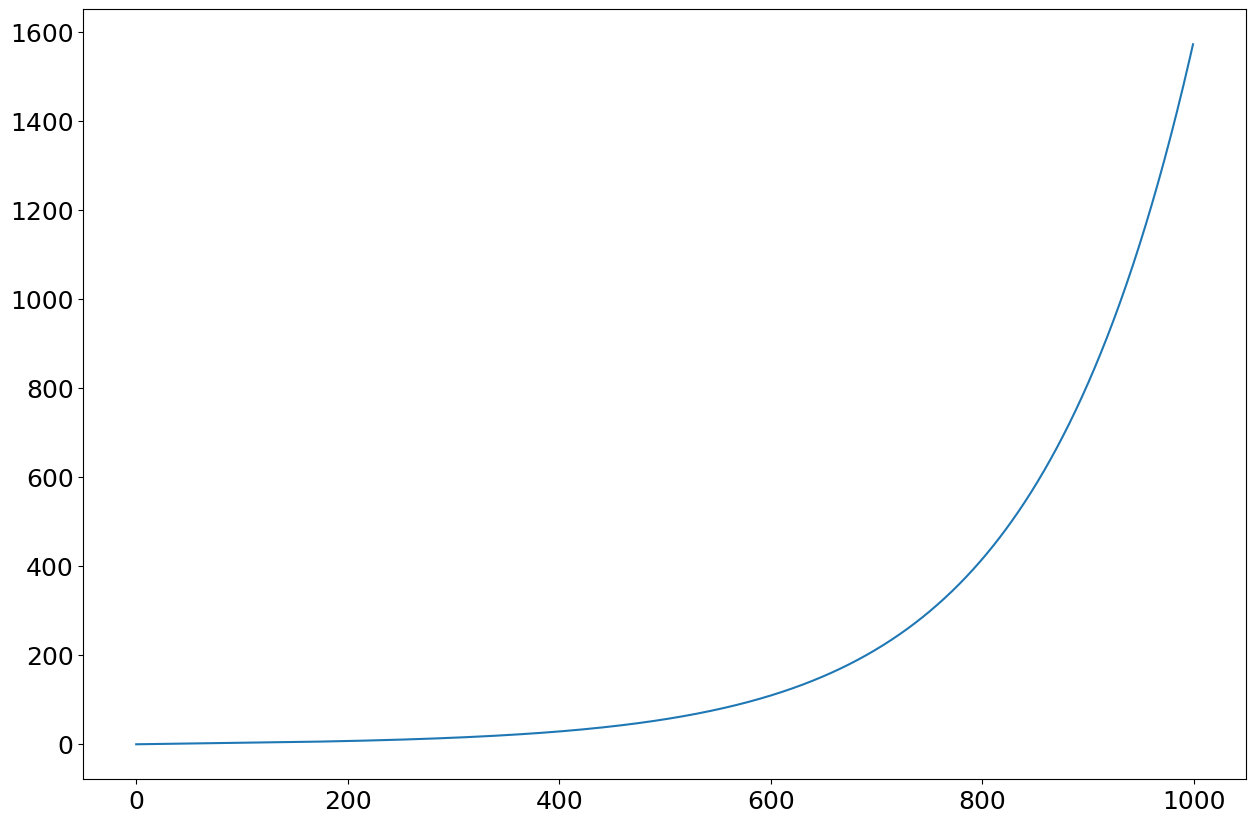

In [10]:
plt.plot(vm3(ts, lbda=1.5, tau=0))

/tmp/ipykernel_7193/1084057792.py:4: RuntimeWarning: divide by zero encountered in divide
  return num / den
/tmp/ipykernel_7193/1084057792.py:4: RuntimeWarning: invalid value encountered in divide
  return num / den


Text(0, 0.5, 'Vm and Rm units of initial values')

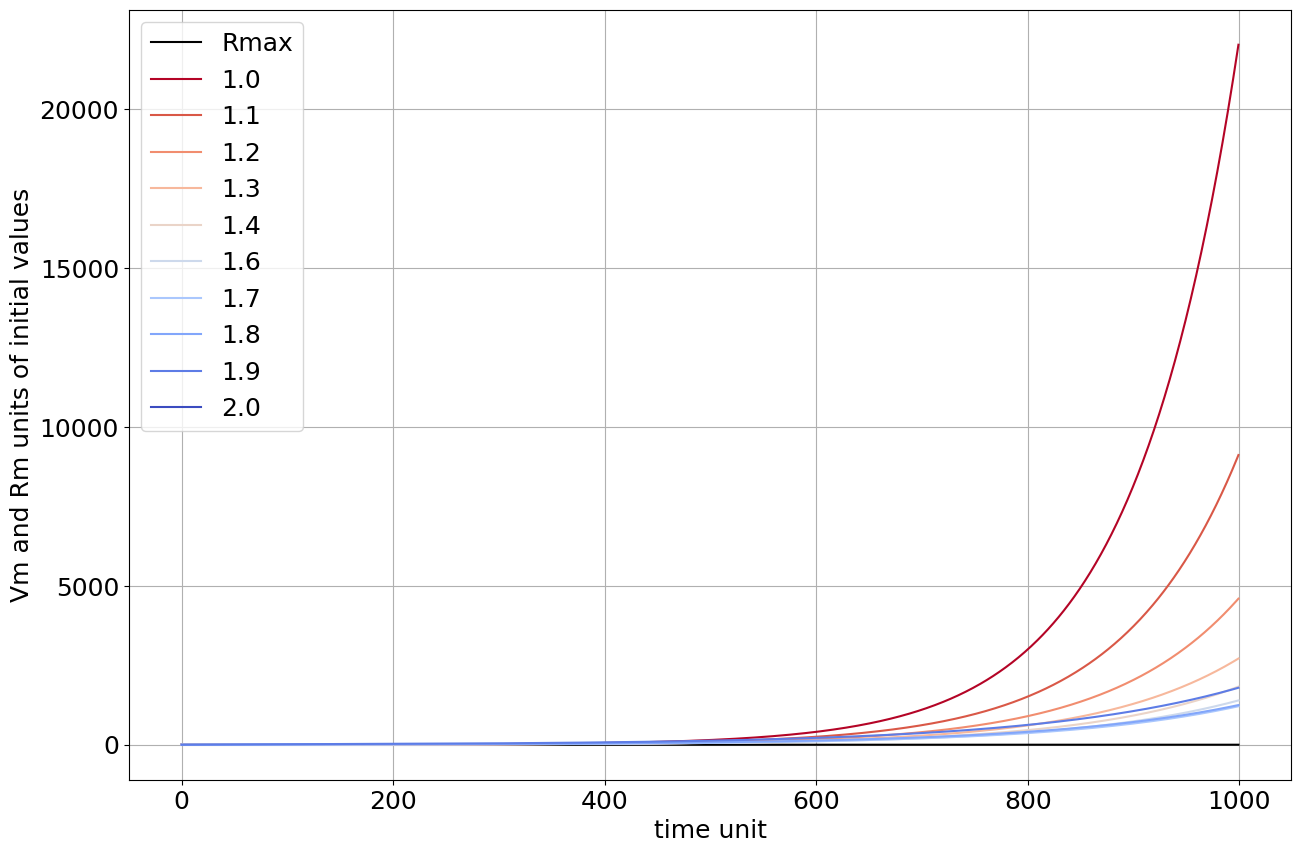

In [11]:
tau    = 0
ts     = np.linspace(0, 10, 1000)
lbdas  = np.linspace(1, 2, 10)
colors = mpl.cm.coolwarm_r(np.linspace(0, 1, len(lbdas)))

plt.plot(rm(ts),       c='k',       label='Rmax')
for i, lbda in enumerate(lbdas):
    plt.plot(vm3(ts, lbda, tau=tau), label='{:.1f}'.format(lbda), c=colors[i])
plt.legend()
plt.grid()
plt.xlabel('time unit');plt.ylabel('Vm and Rm units of initial values')

#### Non zero Rmax at t >> 1

Text(0, 0.5, 'Vm and 10 * Rm (adimensional)')

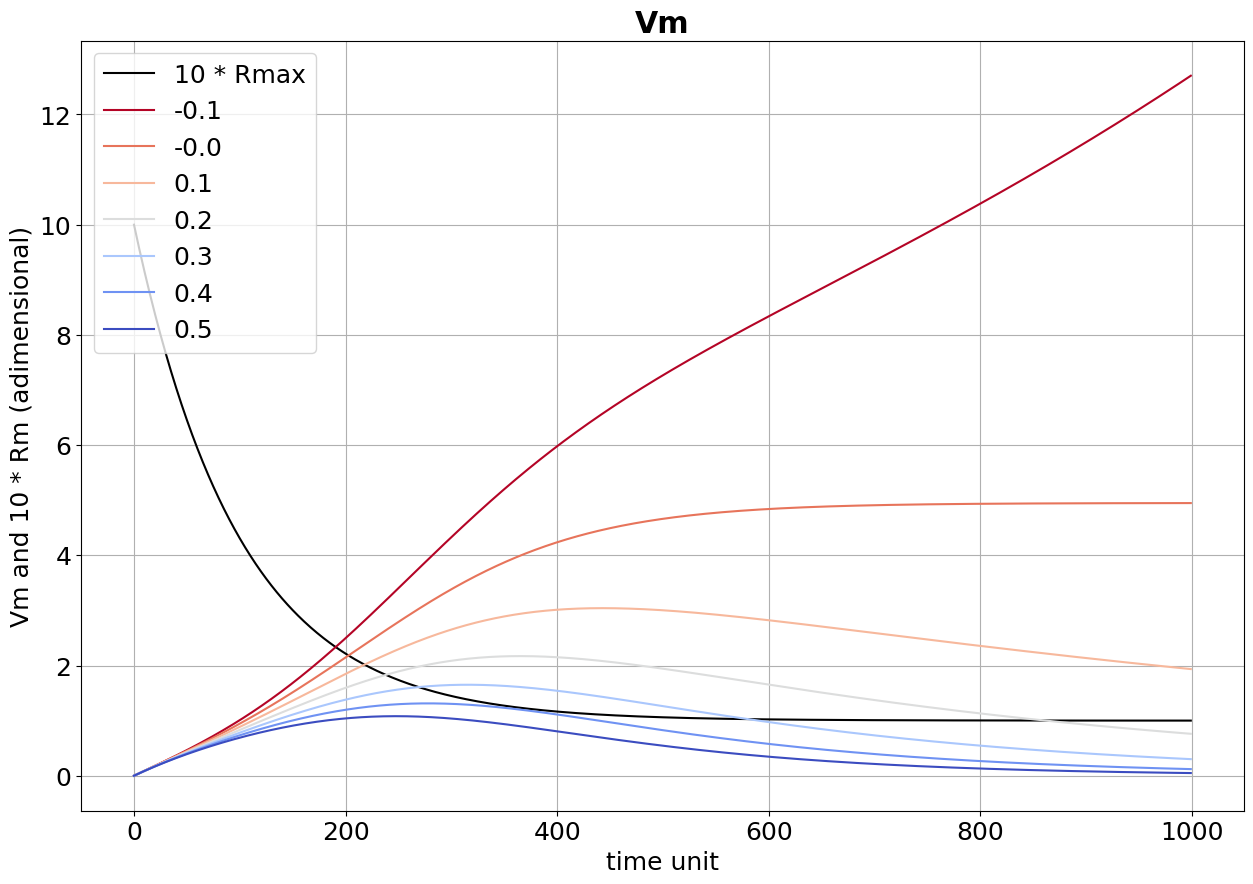

In [12]:
def vm(t, lbda=1.5, r_star=0.25):
    den = np.exp(-t) * (1 - r_star) + r_star
    a   = ((1 - r_star) ** 2) * (np.exp(-2 * t) - np.exp(-lbda * t)) / (lbda - 2)
    b   = r_star * (1 - r_star) * (np.exp(-t) - np.exp(-lbda * t)) / (lbda - 1)
    return (a + b) / den

def rm(t, r_star=0.25):
    return np.exp(-t) + (1 - np.exp(-t)) * r_star

ts     = np.linspace(0, 10, 1000)
lbdas  = np.linspace(-0.1, 0.5, 7)
r_star = 0.1
colors = mpl.cm.coolwarm_r(np.linspace(0, 1, len(lbdas)))

plt.title('Vm', weight='bold')
plt.plot(10 * rm(ts, r_star=r_star),       c='k',       label='10 * Rmax')

for i, lbda in enumerate(lbdas):
    plt.plot(vm(ts, lbda, r_star=r_star), label='{:.1f}'.format(lbda), c=colors[i])
plt.legend()
plt.grid()
plt.xlabel('time unit');plt.ylabel('Vm and 10 * Rm (adimensional)')

#### Inner-core

In [13]:
import scipy.integrate as integrate

def get_beta(alpha):
    return (2 - alpha) / alpha

def derivative(u, lbda, alpha):
    '''r0 = 1'''
    beta = get_beta(alpha)
    return (-1 / alpha) * (u ** beta) * np.exp((lbda / alpha) * (1 - u))

def C(T, lbda, alpha):
    C = integrate.quad(
        func=lambda u: derivative(u, lbda, alpha),
        a=0,
        b=T  
    )
    return C

In [14]:
C(2, 0, -2)

/tmp/ipykernel_7193/695030665.py:12: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  C = integrate.quad(


(-0.25, 2.2737367544323206e-13)

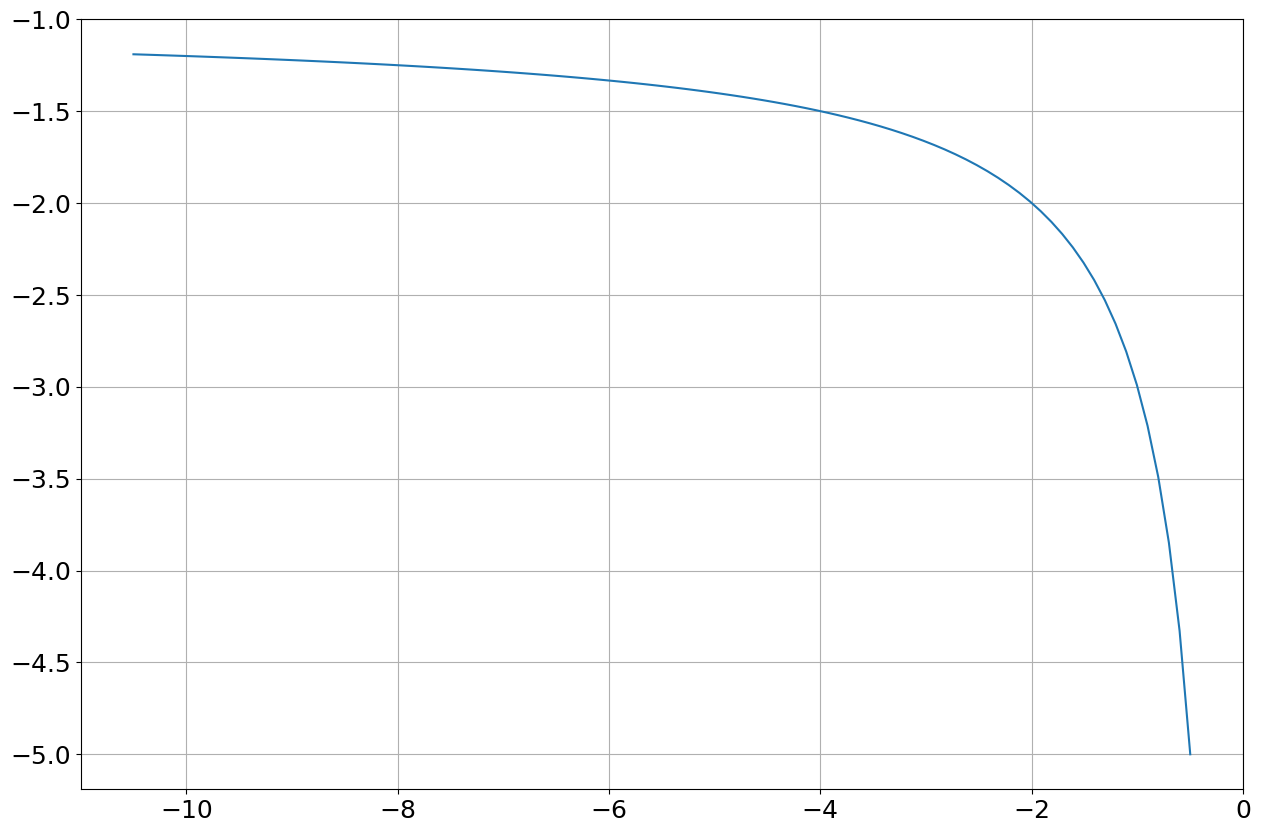

In [15]:
alphas = np.linspace(-0.5, -10.5, 100)

plt.plot(alphas, get_beta(alphas));plt.grid()

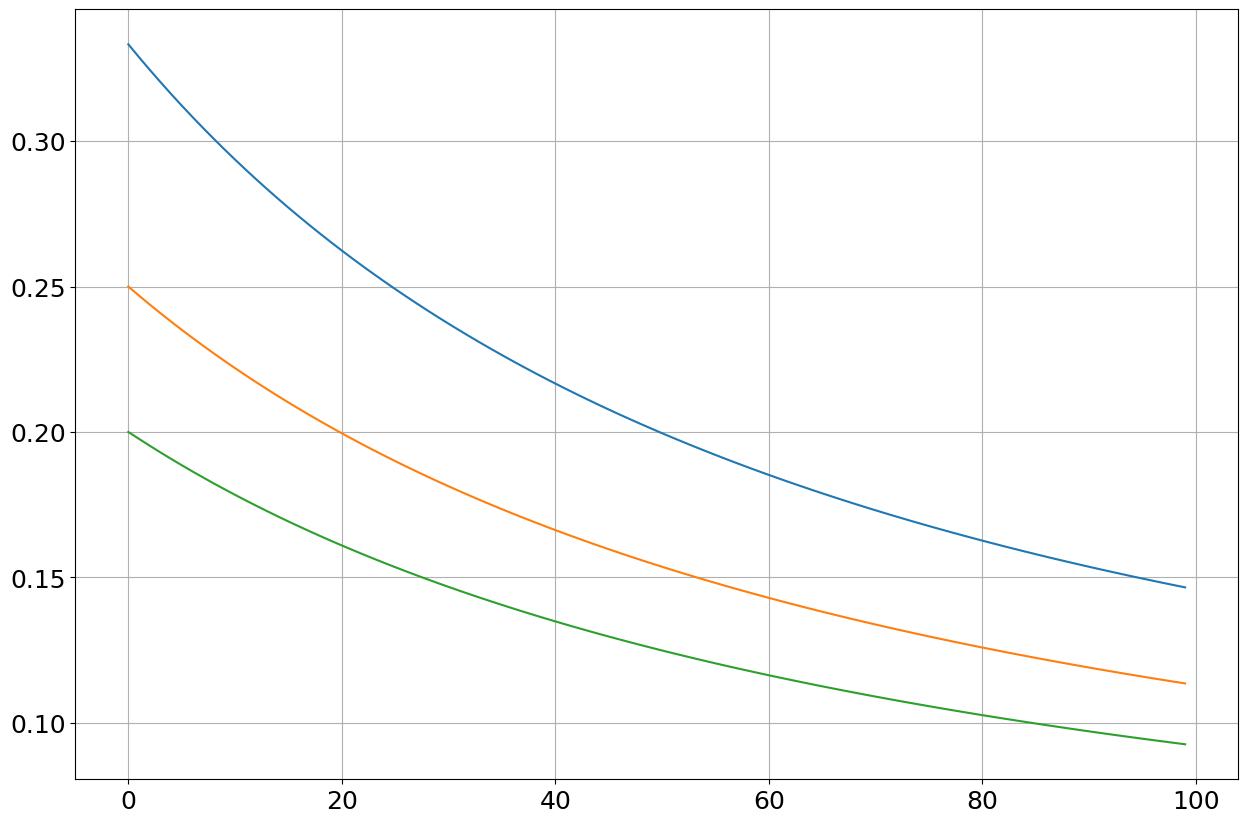

In [16]:
Ts = np.linspace(1, 2, 100)
plt.plot(derivative(Ts, 1, -3))
plt.plot(derivative(Ts, 1, -4))
plt.plot(derivative(Ts, 1, -5))
plt.grid()

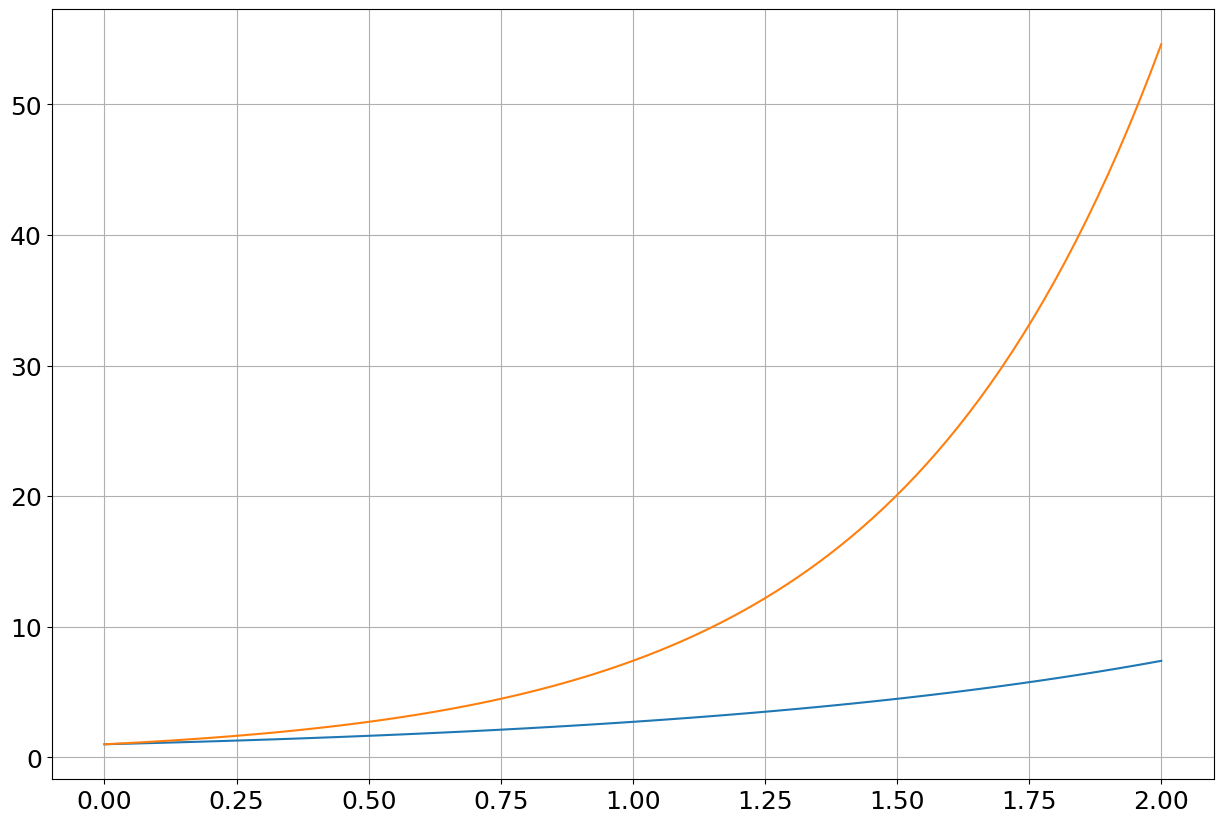

In [17]:
xs = np.linspace(0, 2, 100)
plt.plot(xs, np.exp(xs))
plt.plot(xs, np.exp(2 * xs))
plt.grid()

#### Psi ~ M / r

Text(0, 0.5, 'z')

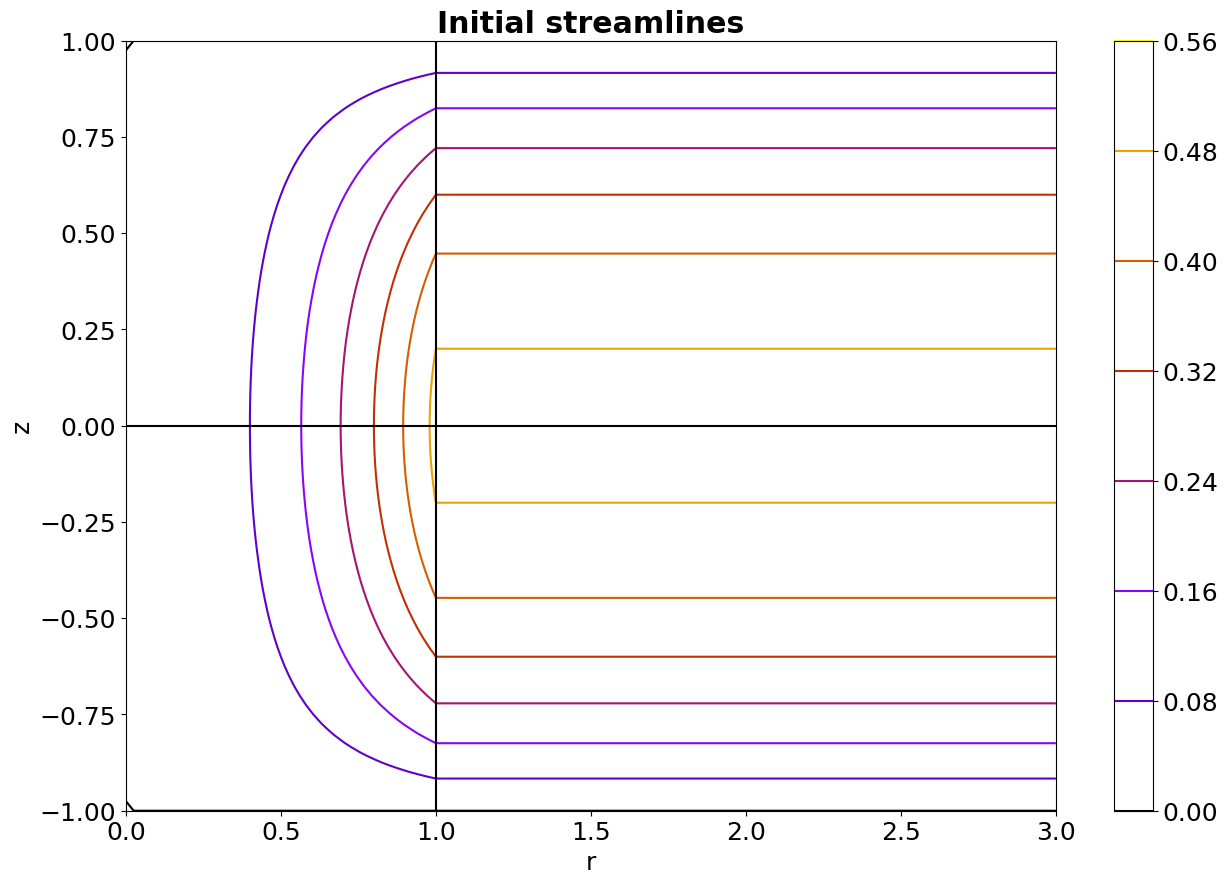

In [18]:
rs   = np.linspace(0, 3, 121)
zs   = np.linspace(-1, 1, 81)
R, Z = np.meshgrid(rs, zs)
# _, Z = np.meshgrid(rs, 1 - zs ** 2)

psi = xr.DataArray(
    data=np.zeros_like(R),
    coords={'z': zs, 'r': rs},
)

psi  = xr.where(psi.r <= 1, 0.5 * psi.r ** 2 * (1 - psi.z ** 2), 0.5 * (1 - psi.z ** 2))

plt.title('Initial streamlines', weight='bold')
plt.contour(R, Z, psi.transpose(), cmap=cm.get_cmap('gnuplot'));plt.colorbar()
plt.axvline(1, c='k');plt.axhline(0, c='k')
plt.xlabel('r');plt.ylabel('z')

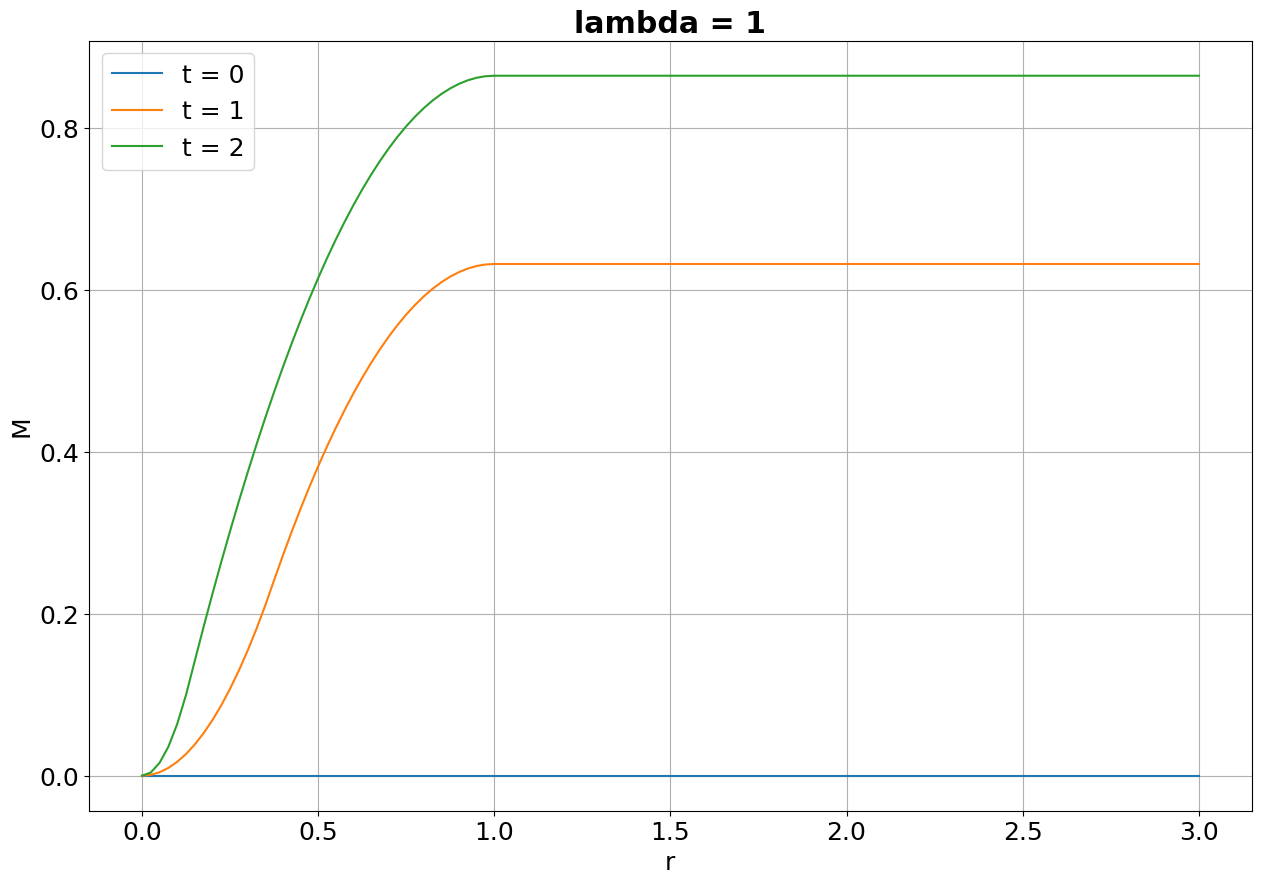

/tmp/ipykernel_7193/3430090558.py:23: RuntimeWarning: invalid value encountered in divide
  plt.plot(rs, M(rs, t=0, lbda=lbda) / rs, label='t = 0')
/tmp/ipykernel_7193/3430090558.py:24: RuntimeWarning: invalid value encountered in divide
  plt.plot(rs, M(rs, t=1, lbda=lbda) / rs, label='t = 1')
/tmp/ipykernel_7193/3430090558.py:25: RuntimeWarning: invalid value encountered in divide
  plt.plot(rs, M(rs, t=2, lbda=lbda) / rs, label='t = 2')
/tmp/ipykernel_7193/3430090558.py:26: RuntimeWarning: invalid value encountered in divide
  plt.plot(rs, M(rs, t=3, lbda=lbda) / rs, label='t = 3')


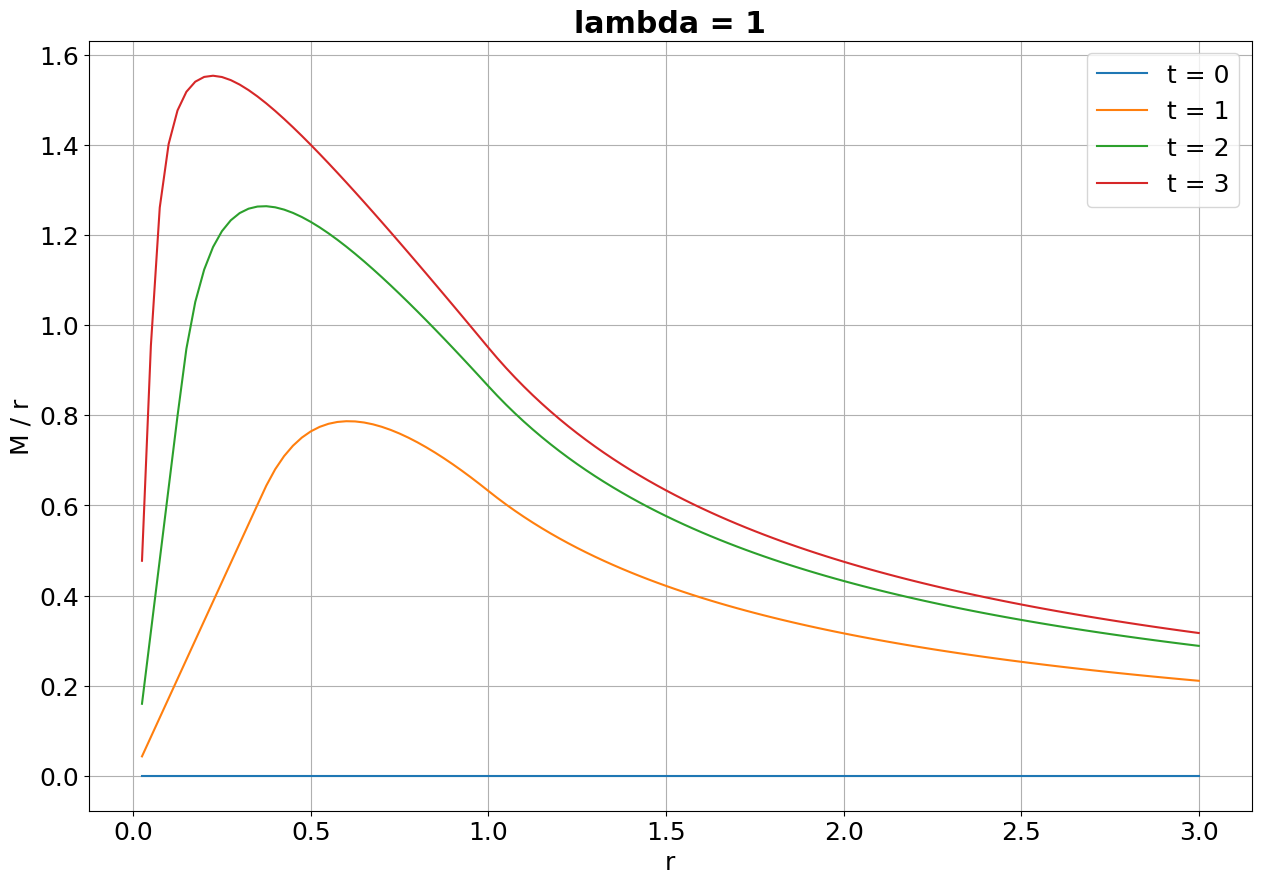

In [19]:
def M(r, t, lbda=1.5):
    M   = r * 0
    Min = (r ** 2) * (1 - np.exp((2 - lbda) * t)) / (lbda - 2)
    Mnr = ((lbda * r ** 2 - 2 * r ** lbda) / (lbda * (lbda - 2))) - (np.exp(-lbda * t) / lbda)
    Mou = (1 - np.exp(-lbda * t)) / lbda
    
    M[r < np.exp(-t)]  = Min[r < np.exp(-t)]
    M[r >= np.exp(-t)] = Mnr[r >= np.exp(-t)]
    M[r >= 1]          = Mou
    
    return M

lbda = 1
plt.title('lambda = {}'.format(lbda), weight='bold')
plt.plot(rs, M(rs, t=0, lbda=lbda),   label='t = 0')
plt.plot(rs, M(rs, t=1, lbda=lbda),   label='t = 1')
plt.plot(rs, M(rs, t=2, lbda=lbda),   label='t = 2')
# plt.plot(rs, M(rs, t=100, lbda=lbda), label='t = 100')
plt.legend();plt.grid();plt.ylabel('M');plt.xlabel('r')
plt.show()

plt.title('lambda = {}'.format(lbda), weight='bold')
plt.plot(rs, M(rs, t=0, lbda=lbda) / rs, label='t = 0')
plt.plot(rs, M(rs, t=1, lbda=lbda) / rs, label='t = 1')
plt.plot(rs, M(rs, t=2, lbda=lbda) / rs, label='t = 2')
plt.plot(rs, M(rs, t=3, lbda=lbda) / rs, label='t = 3')
plt.legend();plt.grid();plt.ylabel('M / r');plt.xlabel('r')
plt.show()

/tmp/ipykernel_7193/37930649.py:1: RuntimeWarning: invalid value encountered in divide
  da1 = np.matmul(np.expand_dims(np.array(1 - psi.z ** 2), axis=1), np.expand_dims(M(rs, t=1, lbda=lbda) / rs, axis=0))
/tmp/ipykernel_7193/37930649.py:2: RuntimeWarning: invalid value encountered in divide
  da2 = np.matmul(np.expand_dims(np.array(1 - psi.z ** 2), axis=1), np.expand_dims(M(rs, t=2, lbda=lbda) / rs, axis=0))
/tmp/ipykernel_7193/37930649.py:3: RuntimeWarning: invalid value encountered in divide
  da3 = np.matmul(np.expand_dims(np.array(1 - psi.z ** 2), axis=1), np.expand_dims(M(rs, t=3, lbda=lbda) / rs, axis=0))


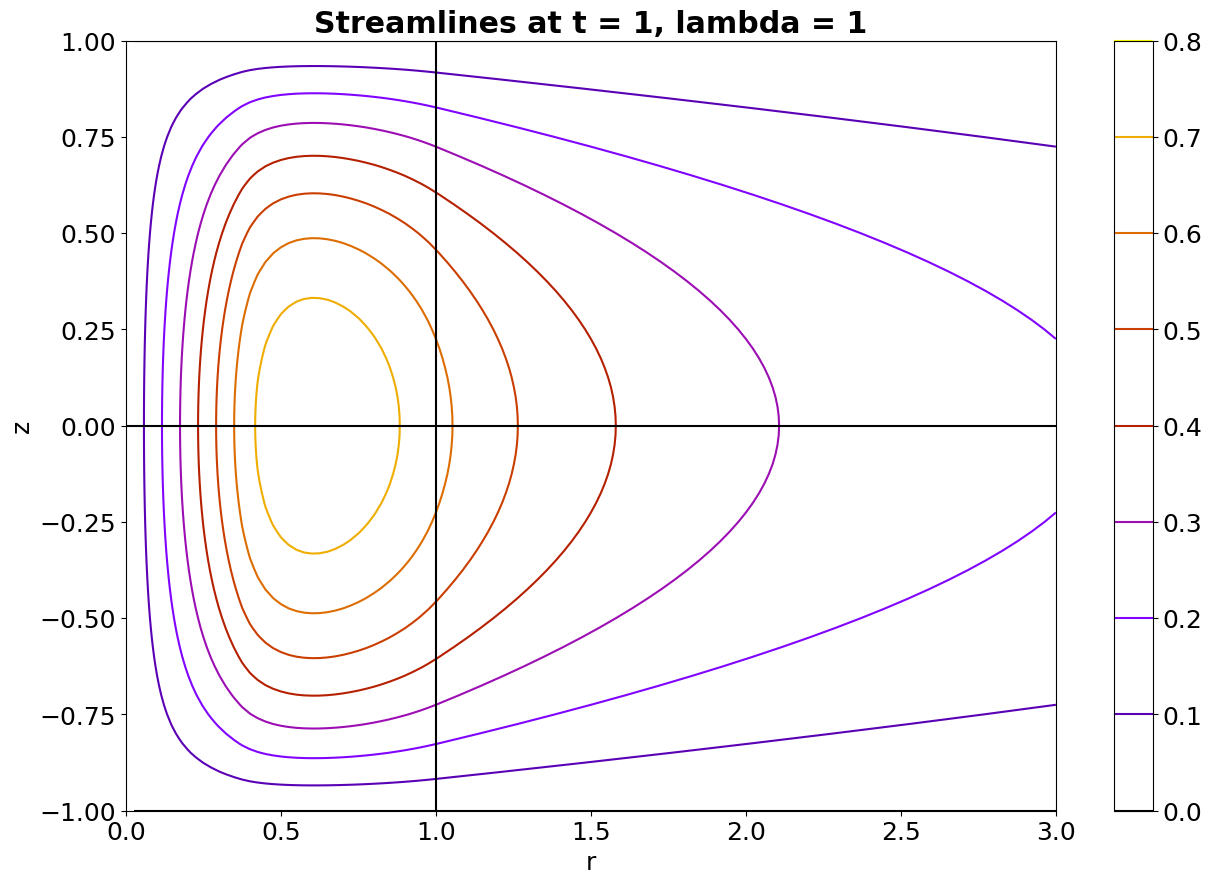

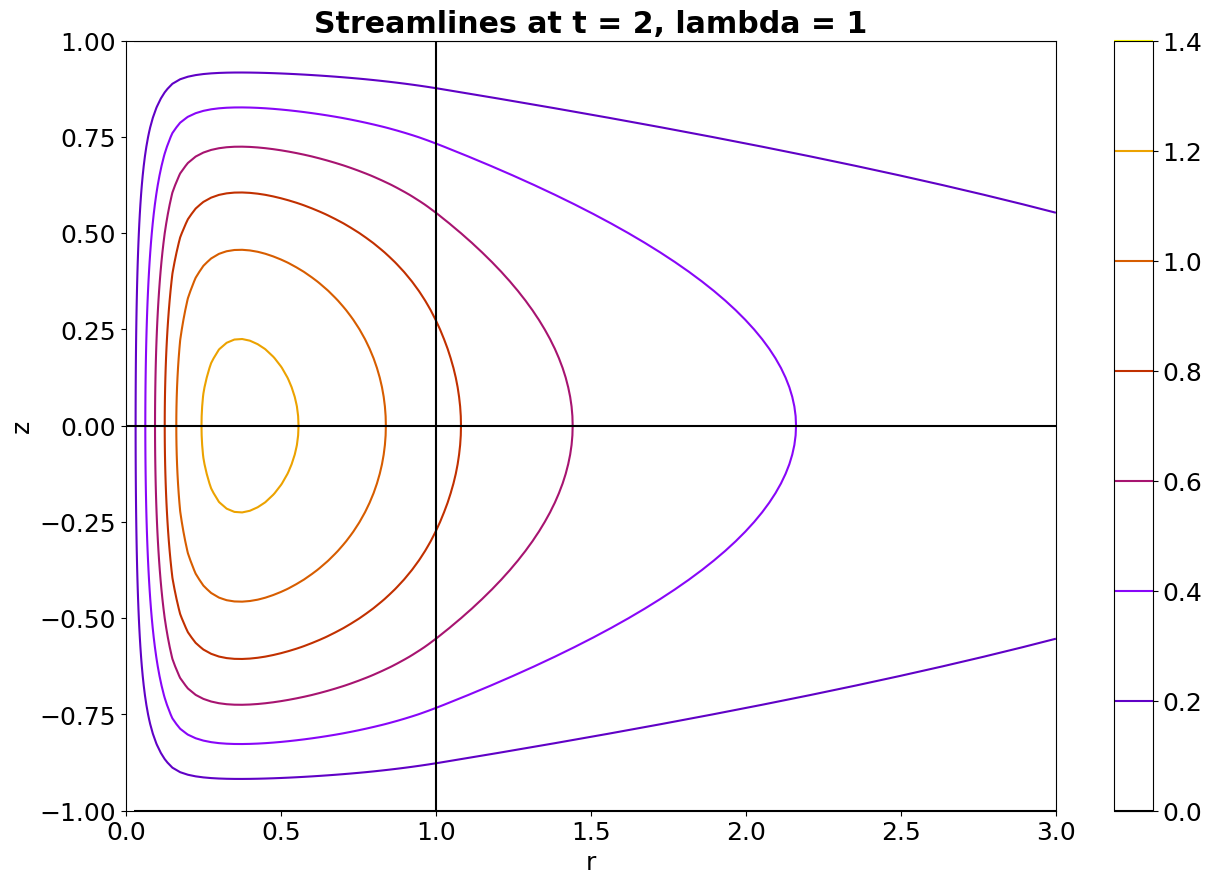

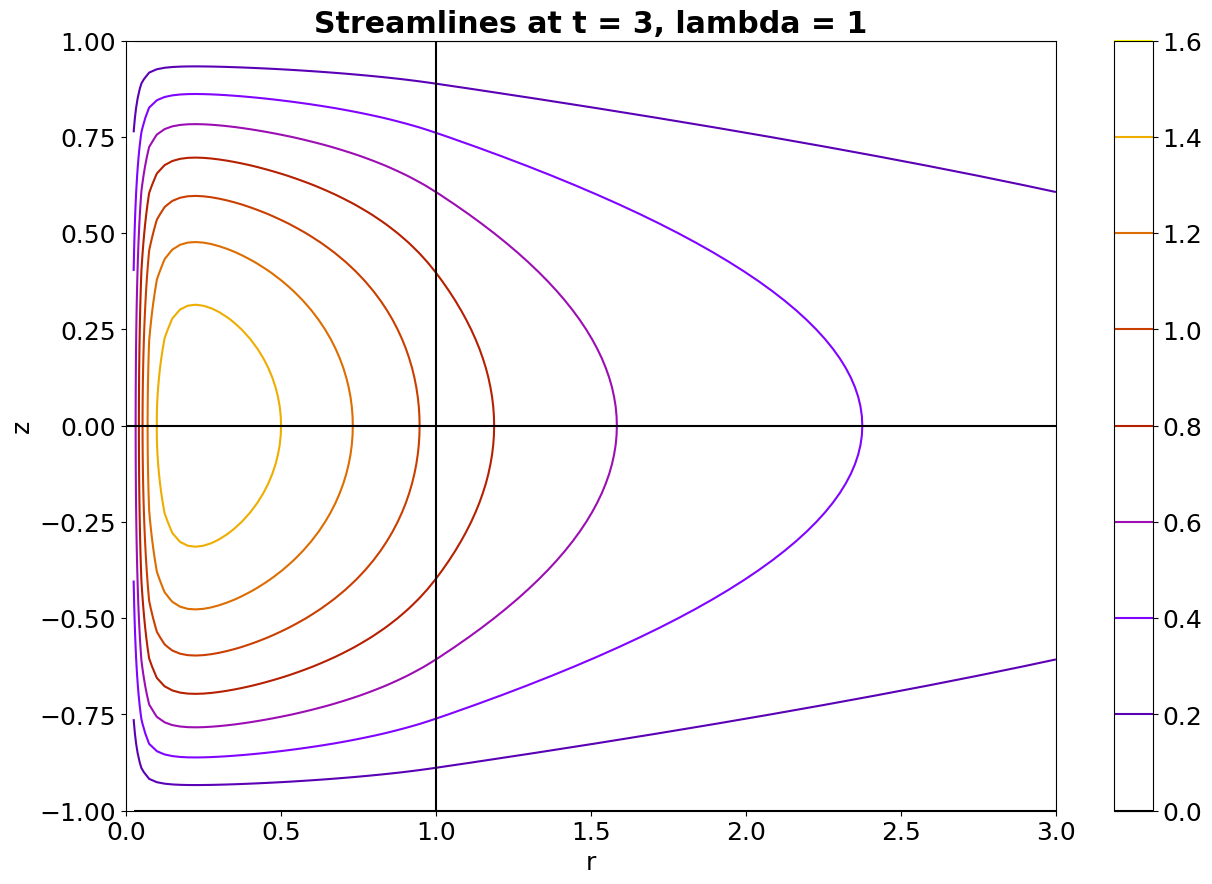

In [20]:
da1 = np.matmul(np.expand_dims(np.array(1 - psi.z ** 2), axis=1), np.expand_dims(M(rs, t=1, lbda=lbda) / rs, axis=0))
da2 = np.matmul(np.expand_dims(np.array(1 - psi.z ** 2), axis=1), np.expand_dims(M(rs, t=2, lbda=lbda) / rs, axis=0))
da3 = np.matmul(np.expand_dims(np.array(1 - psi.z ** 2), axis=1), np.expand_dims(M(rs, t=3, lbda=lbda) / rs, axis=0))

psi1 = xr.DataArray(data=da1, coords={'z': zs, 'r': rs})
psi2 = xr.DataArray(data=da2, coords={'z': zs, 'r': rs})
psi3 = xr.DataArray(data=da3, coords={'z': zs, 'r': rs})

plt.title('Streamlines at t = 1, lambda = {}'.format(lbda), weight='bold')
plt.contour(R, Z, psi1, cmap=cm.get_cmap('gnuplot'));plt.colorbar()
plt.axvline(1, c='k');plt.axhline(0, c='k')
plt.xlabel('r');plt.ylabel('z')
plt.show()

plt.title('Streamlines at t = 2, lambda = {}'.format(lbda), weight='bold')
plt.contour(R, Z, psi2, cmap=cm.get_cmap('gnuplot'));plt.colorbar()
plt.axvline(1, c='k');plt.axhline(0, c='k')
plt.xlabel('r');plt.ylabel('z')
plt.show()

plt.title('Streamlines at t = 3, lambda = {}'.format(lbda), weight='bold')
plt.contour(R, Z, psi3, cmap=cm.get_cmap('gnuplot'));plt.colorbar()
plt.axvline(1, c='k');plt.axhline(0, c='k')
plt.xlabel('r');plt.ylabel('z')
plt.show()

#### Time-dependence

In [21]:
def vmt(t, vm0=1., alpha=0.5, lbda=1.5):
    return vm0 * (1 + np.exp(t)) * np.exp((alpha - lbda) * t) / 2

def rmt(t):
    return 2 / (1 + np.exp(t))

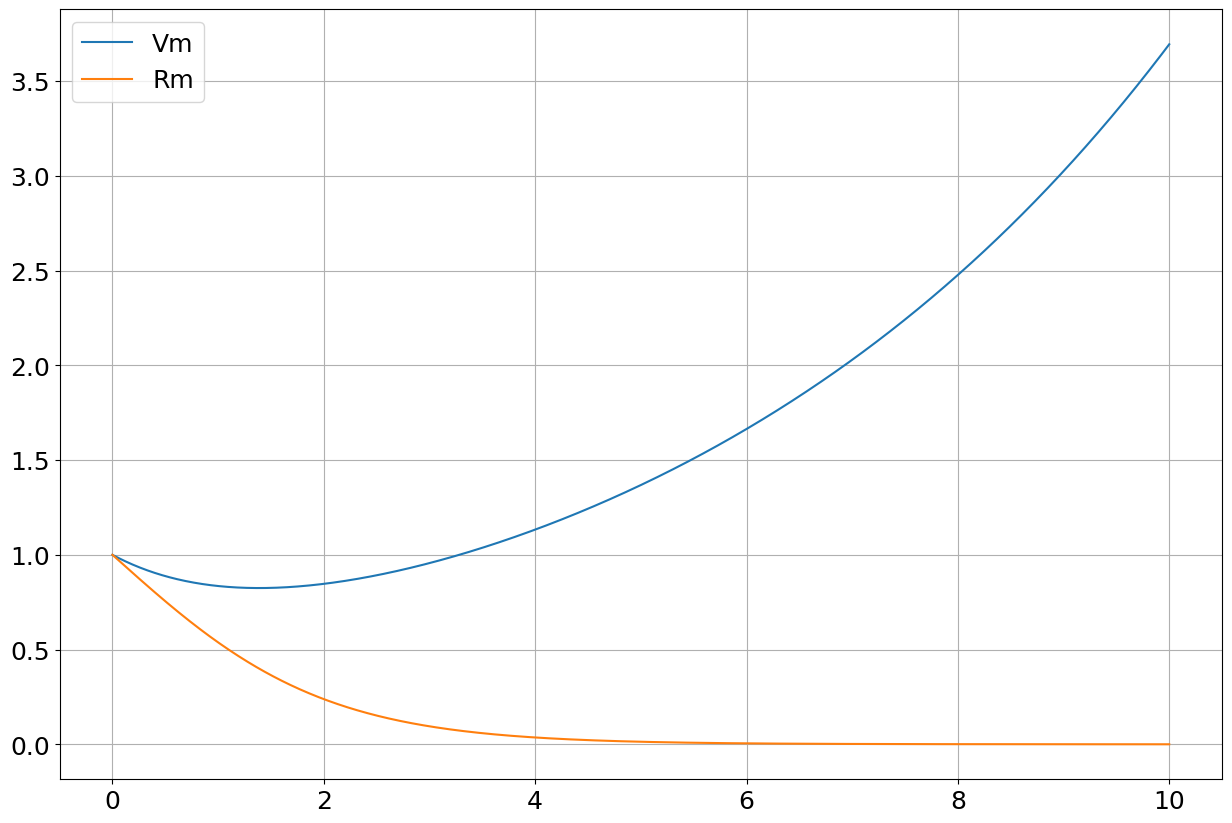

In [22]:
ts = np.linspace(0, 10, 1000)

lbda = 1.3
plt.plot(ts, vmt(ts, lbda=lbda), label='Vm')
plt.plot(ts, rmt(ts), label='Rm')
plt.grid();plt.legend()

In [24]:
# plt.plot(big_term(rs, a, b))

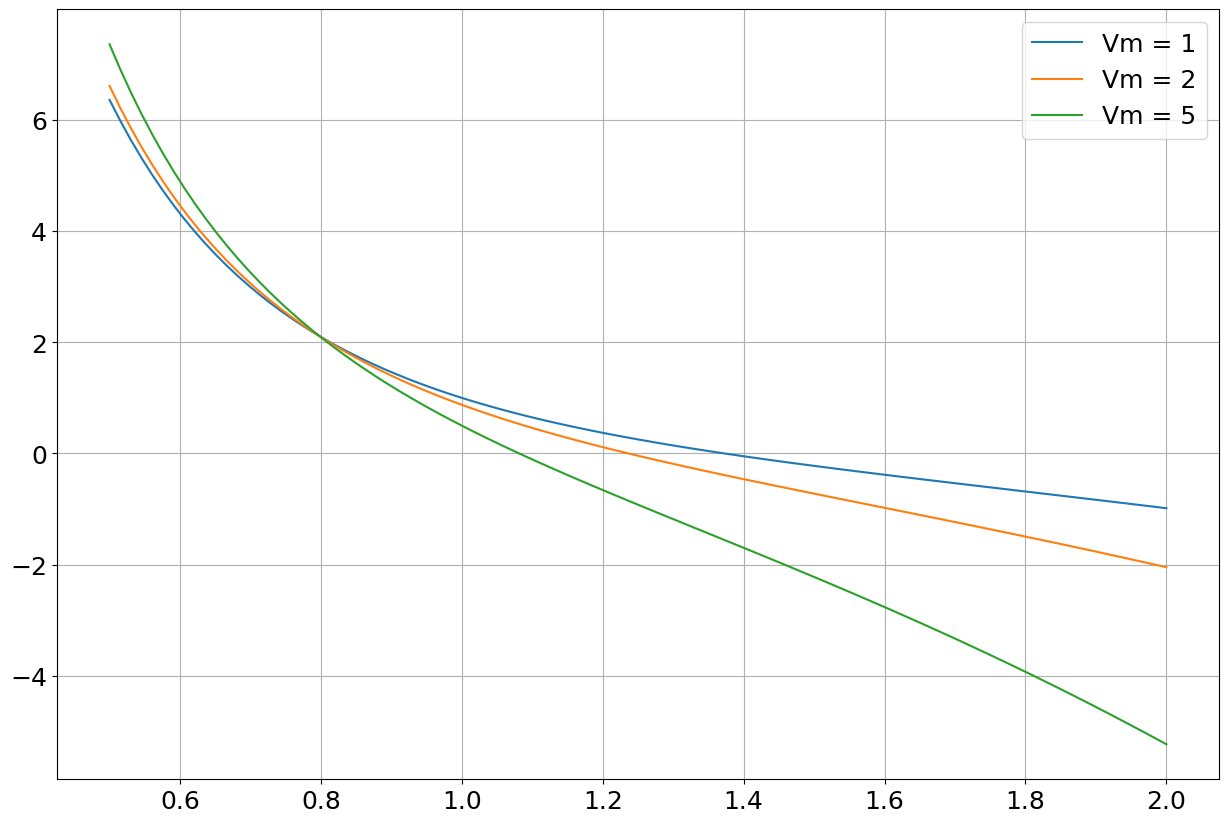

In [25]:
### TEST
Cd = 1
Vm = 1
Rm = 1
Wm = 1.

def big_term(r, a, b):
    return a * b * (3 * a ** 3 - 6 * a ** 2 * r + 6 * a * r ** 2 - 4 * r ** 3)

a = 1
b = Cd * Vm / (a * Rm)
c = (Wm * Rm - big_term(Rm, a, b) / 8) * np.exp(2 * Rm / a)

def Wtest(r, a, b, c=1.):
    num = big_term(r, a, b) + 8 * c * np.exp(-2 * r / a)
    den = 8 * r
    return num / den

rs = np.linspace(0.5, 2, 100)

plt.plot(rs, Wtest(rs, a, b, c), label='Vm = 1')
plt.plot(rs, Wtest(rs, a, 2 * b, c), label='Vm = 2')
plt.plot(rs, Wtest(rs, a, 5 * b, c), label='Vm = 5')
plt.grid();plt.legend()

In [26]:
# def M(r, t, lbda=1.5):
#     M   = r * 0
#     Min = (r ** 2) * (1 - np.exp((2 - lbda) * t)) / (lbda - 2)
#     Mnr = ((lbda * r ** 2 - 2 * r ** lbda) / (lbda * (lbda - 2))) - (np.exp(-lbda * t) / lbda)
#     Mou = (1 - np.exp(-lbda * t)) / lbda
    
#     M[r < np.exp(-t)]  = Min[r < np.exp(-t)]
#     M[r >= np.exp(-t)] = Mnr[r >= np.exp(-t)]
#     M[r >= 1]          = Mou
    
#     return M

In [27]:
def v(r, t, lbda=1.5, beta=1.0, v0=1.0):
    # Useful terms
    ini_term = v0 * np.exp(- lbda * t)
    log_term = (2 / beta) * (np.log(1 + np.exp(beta * t)) - np.log(2))
    
    # Initialization of the parts
    v   = r * 0
    vin = ini_term / (1 - (r * log_term))
    vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r
    vou = np.sqrt(r ** 2      + (2 * log_term)) * ini_term / r
    
    # Declare final output
    bd  = 1 / (1 + log_term)
    v[r < bd]  = vin[r < bd]
    v[r >= bd] = vnr[r >= bd]
    v[r >= 1]  = vou[r >= 1]
    
    return v

def V_rankine(r):
    v         = r * 0
    vin       = r
    vou       = 1 / r
    v[r < 1]  = vin[r < 1]
    v[r >= 1] = vou[r >= 1]
    return v

/tmp/ipykernel_7193/1106570230.py:9: RuntimeWarning: divide by zero encountered in divide
  vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r
/tmp/ipykernel_7193/1106570230.py:9: RuntimeWarning: invalid value encountered in sqrt
  vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r
/tmp/ipykernel_7193/1106570230.py:10: RuntimeWarning: invalid value encountered in divide
  vou = np.sqrt(r ** 2      + (2 * log_term)) * ini_term / r
/tmp/ipykernel_7193/1106570230.py:9: RuntimeWarning: divide by zero encountered in divide
  vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r
/tmp/ipykernel_7193/1106570230.py:9: RuntimeWarning: invalid value encountered in sqrt
  vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r
/tmp/ipykernel_7193/1106570230.py:10: RuntimeWarning: divide by zero encountered in divide
  vou = np.sqrt(r ** 2      + (2 * log_term)) * ini_term / r
/tmp/ipykernel_7193/1106570230.py:9: RuntimeWarning: divide by zero encountered in divide
  vnr = n

Text(0, 0.5, 'v')

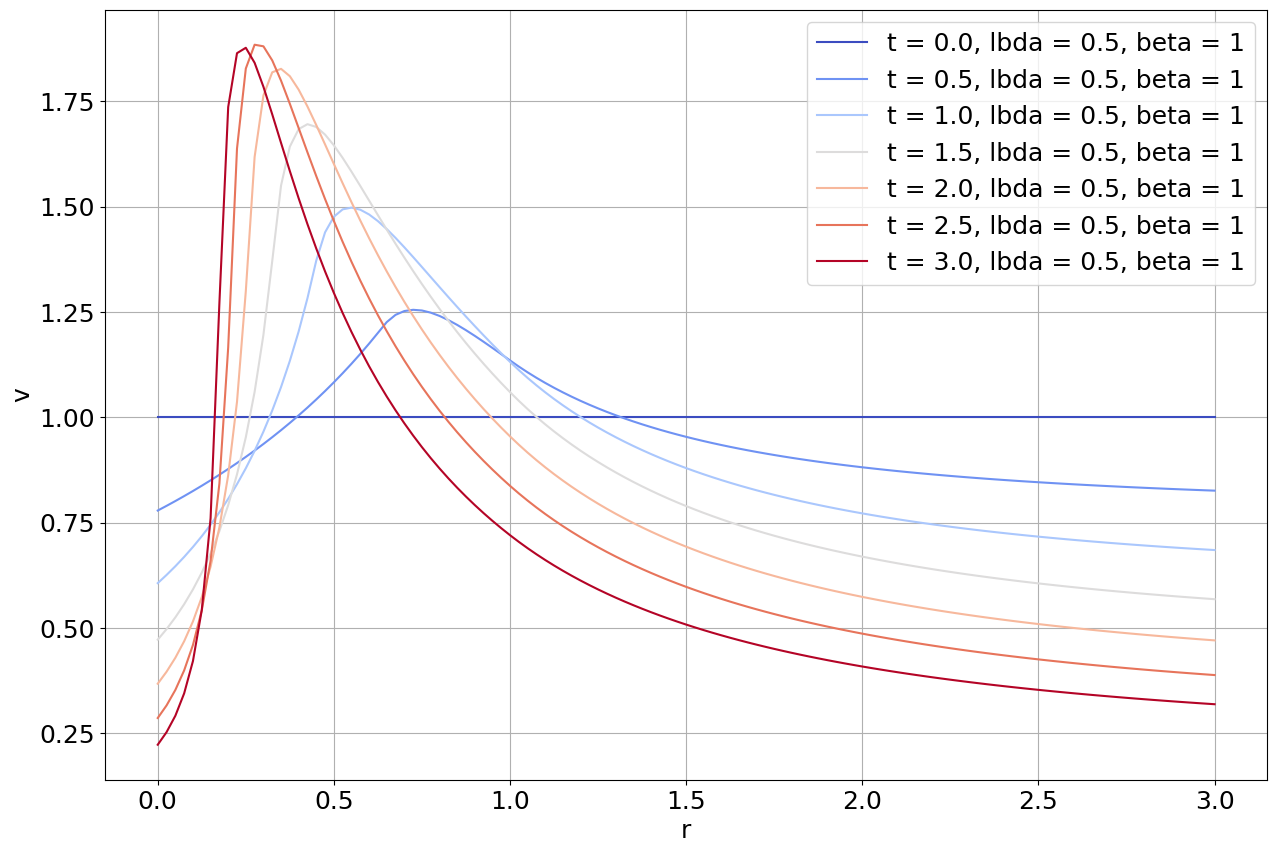

In [28]:
rs     = np.linspace(0, 3, 121)
ts     = np.linspace(0, 3, 7)
colors = mpl.cm.coolwarm(np.linspace(0, 1, len(ts)))

lbda = 0.5
beta = 1
v0   = 1.0
# v0   = V_rankine(rs)

for i, t in enumerate(ts):
    plt.plot(rs, v(rs, t=t, lbda=lbda, beta=beta, v0=v0), label='t = {}, lbda = {}, beta = {}'.format(t, lbda, beta), c=colors[i])
plt.grid();plt.legend()
plt.xlabel('r');plt.ylabel('v')

/tmp/ipykernel_7193/1106570230.py:9: RuntimeWarning: divide by zero encountered in divide
  vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r
/tmp/ipykernel_7193/1106570230.py:9: RuntimeWarning: invalid value encountered in sqrt
  vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r
/tmp/ipykernel_7193/1106570230.py:10: RuntimeWarning: invalid value encountered in divide
  vou = np.sqrt(r ** 2      + (2 * log_term)) * ini_term / r
/tmp/ipykernel_7193/1106570230.py:9: RuntimeWarning: divide by zero encountered in divide
  vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r
/tmp/ipykernel_7193/1106570230.py:9: RuntimeWarning: invalid value encountered in sqrt
  vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r
/tmp/ipykernel_7193/1106570230.py:10: RuntimeWarning: divide by zero encountered in divide
  vou = np.sqrt(r ** 2      + (2 * log_term)) * ini_term / r
/tmp/ipykernel_7193/1106570230.py:9: RuntimeWarning: divide by zero encountered in divide
  vnr = n

Text(0, 0.5, 'v')

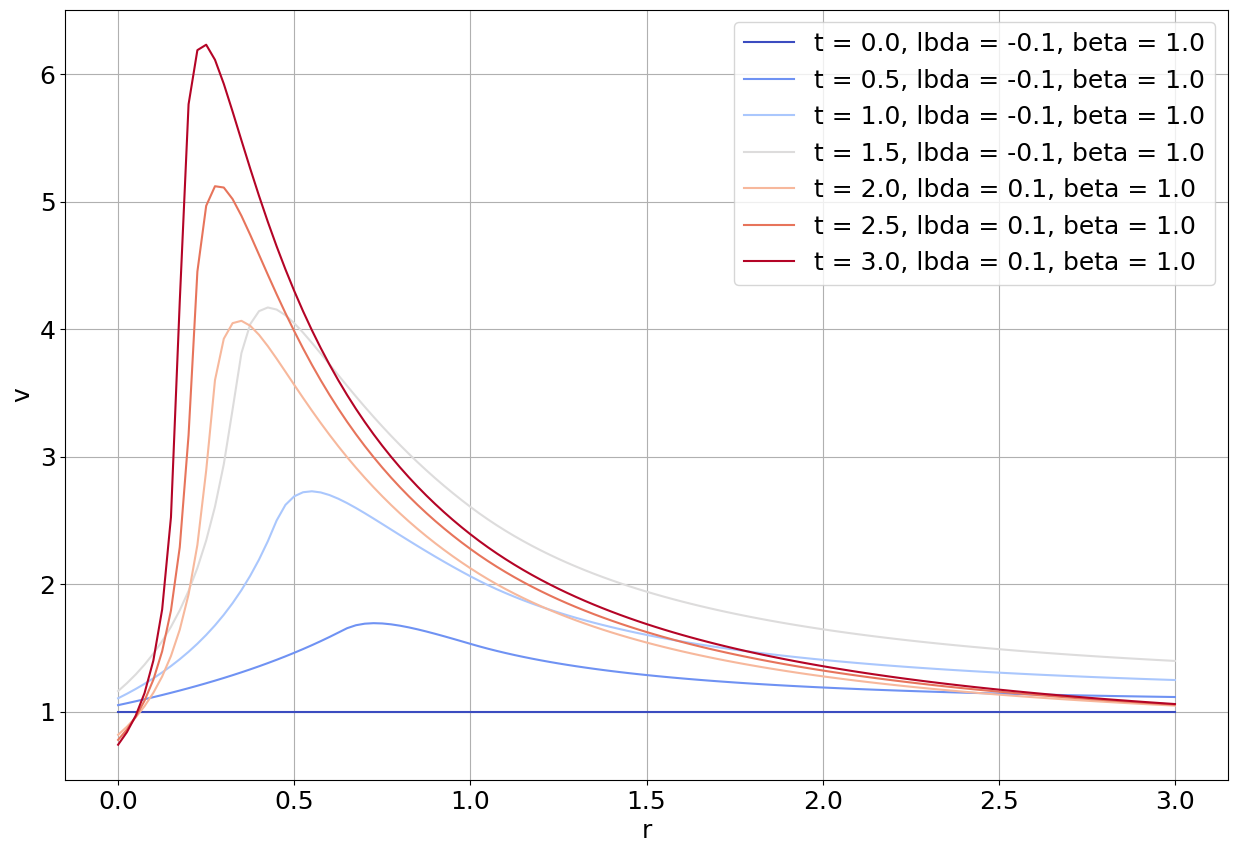

In [29]:
beta = 1.0
for i, t in enumerate(ts):
    if t < 2:
        lbda = -0.1
        plt.plot(rs, v(rs, t=t, lbda=lbda, beta=beta, v0=v0), label='t = {}, lbda = {}, beta = {}'.format(t, lbda, beta), c=colors[i])
    else:
        lbda = 0.1
        plt.plot(rs, v(rs, t=t, lbda=lbda, beta=beta, v0=v0), label='t = {}, lbda = {}, beta = {}'.format(t, lbda, beta), c=colors[i])
plt.grid();plt.legend()
plt.xlabel('r');plt.ylabel('v')

/tmp/ipykernel_7193/2493052606.py:18: RuntimeWarning: divide by zero encountered in divide
  vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r + discontinuity(r, t, lbda)
/tmp/ipykernel_7193/2493052606.py:18: RuntimeWarning: invalid value encountered in sqrt
  vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r + discontinuity(r, t, lbda)
/tmp/ipykernel_7193/2493052606.py:4: RuntimeWarning: invalid value encountered in divide
  return (1 - np.exp(-lbda * t)) / (lbda * r)
/tmp/ipykernel_7193/2493052606.py:20: RuntimeWarning: invalid value encountered in divide
  vou = np.sqrt(r ** 2      + (2 * log_term)) * ini_term / r + discontinuity(r, t, lbda)
/tmp/ipykernel_7193/2493052606.py:18: RuntimeWarning: divide by zero encountered in divide
  vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r + discontinuity(r, t, lbda)
/tmp/ipykernel_7193/2493052606.py:18: RuntimeWarning: invalid value encountered in sqrt
  vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r 

Text(0, 0.5, 'v')

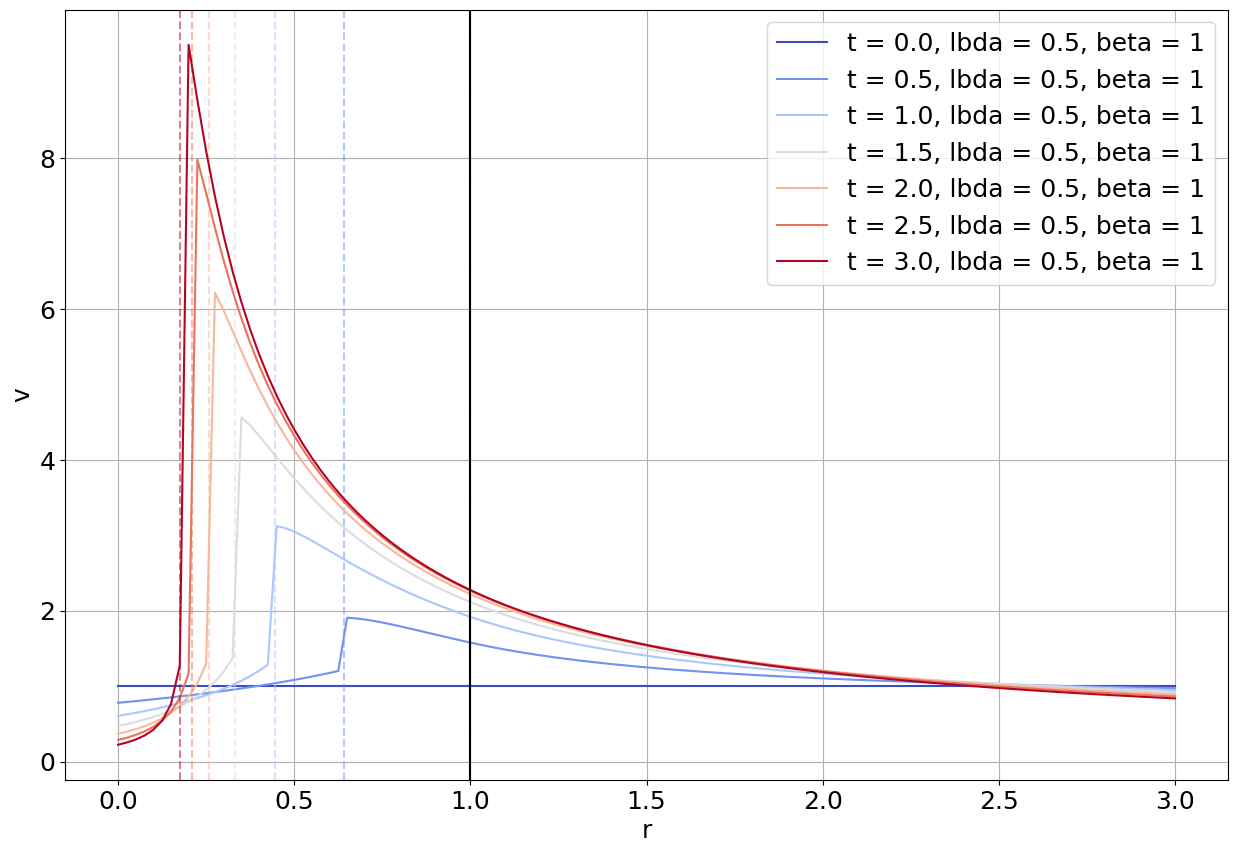

In [30]:
### TEST WITH "DISCONTINUOUS" SOLUTION

def discontinuity(r, t, lbda):
    return (1 - np.exp(-lbda * t)) / (lbda * r)

def Fcon(r, rm):
    return (r - rm) / (1 - rm)

def v2(r, t, lbda=1.5, beta=1.0, v0=1.0):
    # Useful terms
    ini_term = v0 * np.exp(- lbda * t)
    log_term = (2 / beta) * (np.log(1 + np.exp(beta * t)) - np.log(2))
    rm       = 1 / (1 + log_term)
    
    # Initialization of the parts
    v   = r * 0
    vin = ini_term / (1 - (r * log_term))
    vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r + discontinuity(r, t, lbda)
    # vnr = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r + discontinuity(r, t, lbda) * Fcon(r, rm)
    vou = np.sqrt(r ** 2      + (2 * log_term)) * ini_term / r + discontinuity(r, t, lbda)
    
    # Declare final output
    v[r < rm]  = vin[r < rm]
    v[r >= rm] = vnr[r >= rm]
    v[r >= 1]  = vou[r >= 1]
    
    return v

rs     = np.linspace(0, 3, 121)
ts     = np.linspace(0, 3, 7)
colors = mpl.cm.coolwarm(np.linspace(0, 1, len(ts)))

lbda = 0.5
beta = 1
v0   = 1.0

for i, t in enumerate(ts):
    plt.plot(rs, v2(rs, t=t, lbda=lbda, beta=beta, v0=v0), label='t = {}, lbda = {}, beta = {}'.format(t, lbda, beta), c=colors[i])
    plt.axvline(1 / (1 + (2 / beta) * (np.log(1 + np.exp(beta * t)) - np.log(2))), c=colors[i], alpha=0.5, linestyle='--')
plt.axvline(1, c='k')
plt.grid();plt.legend()
plt.xlabel('r');plt.ylabel('v')

In [31]:
# def s(x, a=1, b=1):
#     '''a: intersection point between the 2 functions to smooth
#     b: smoothing factor'''
#     return 0.5 + 0.5 * np.tanh((x - a) / b) # normalized to return values between 0 and 1

# def v3(r, t, lbda=1.5, beta=1.0, v0=1.0):
#     # Useful terms
#     ini_term = v0 * np.exp(- lbda * t)
#     log_term = (2 / beta) * (np.log(1 + np.exp(beta * t)) - np.log(2))
#     rm       = 1 / (1 + log_term)
#     a        = 1.1 * rm # point of smoothing
#     b        = 0.1  # smoothing factor
    
#     # Initialization of the parts
#     v    = r * 0
#     vin  = ini_term / (1 - (r * log_term))
#     vnr  = np.sqrt(3 - (2 / r) + (2 * log_term)) * ini_term / r + discontinuity(r, t, lbda)
#     smth = s(rs, a=a, b=b) * vnr + (1 - s(rs, a=a, b=b)) * vin
#     vou  = np.sqrt(r ** 2      + (2 * log_term)) * ini_term / r + discontinuity(r, t, lbda)
    
#     # Declare final output
#     # v[r < rm]  = vin[r < rm]
#     # v[r >= rm] = vnr[r >= rm]
#     v[r < 1]   = smth[r < 1]
#     v[r >= 1]  = vou[r >= 1]
    
#     return v

# rs     = np.linspace(0, 3, 121)
# ts     = np.linspace(0, 3, 7)
# colors = mpl.cm.coolwarm(np.linspace(0, 1, len(ts)))

# lbda = 0.5
# beta = 1
# v0   = 1.0

# for i, t in enumerate(ts):
#     plt.plot(rs, v3(rs, t=t, lbda=lbda, beta=beta, v0=v0), label='t = {}, lbda = {}, beta = {}'.format(t, lbda, beta), c=colors[i])
# plt.grid();plt.legend()
# plt.xlabel('r');plt.ylabel('v')

TypeError: 'module' object is not callable

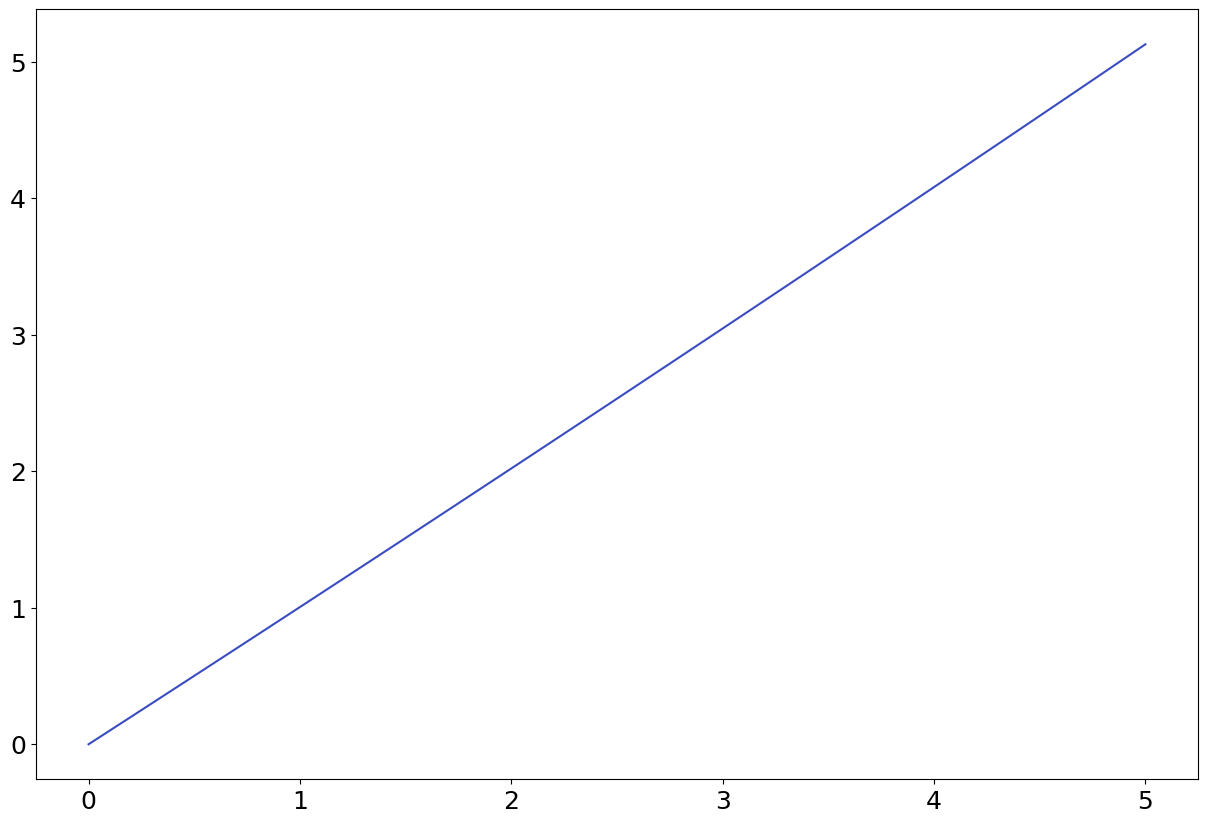

In [34]:
### R17 TEST

def R17_Kalashnik(t, lbda, v0):
    '''Taking V17 = 1'''
    return (1 - np.exp(-lbda * t)) / (lbda)

def R17_v1(t, lbda, beta, v0):
    '''Taking V17 = 1'''
    num = f(t, beta)
    den = 1 - v0 ** 2 * np.exp(-2 * lbda * t)
    return np.sqrt(num / den)

ts     = np.linspace(0, 5, 100)
lbdas = [-0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5]
beta = 1
v0   = 1.0

colors_k = mpl.cm.coolwarm(np.linspace(0, 1, len(lbdas)))

for i, lbda in enumerate(lbdas):
    plt.plot(ts, R17_Kalashnik(ts, lbda=lbda, v0=1),     c=colors_k[i], label='Kalashnik, lbda = {}'.format(lbda))
    plt.plot(ts, R17_v1(ts, lbda=lbda, beta=beta, v0=1), c=colors_k[i], linestyle='dashed')
plt.grid();plt.legend()

#### Kalashnik with initial condition v0

/tmp/ipykernel_7193/3713369712.py:4: RuntimeWarning: divide by zero encountered in divide
  vou       = 1 / r
/tmp/ipykernel_7193/3713369712.py:25: RuntimeWarning: divide by zero encountered in log
  nr_term    = np.sqrt(1 + 2 * (np.log(r) + t))
/tmp/ipykernel_7193/3713369712.py:25: RuntimeWarning: invalid value encountered in sqrt
  nr_term    = np.sqrt(1 + 2 * (np.log(r) + t))
/tmp/ipykernel_7193/3713369712.py:26: RuntimeWarning: invalid value encountered in divide
  vnr        = nr_term * v0(nr_term) * np.exp(-lbda * t) / r + (lbda * r ** 2 - 2 * r ** lbda) / (lbda * r * (lbda - 2)) - np.exp(-lbda * t) / (lbda * r)
/tmp/ipykernel_7193/3713369712.py:26: RuntimeWarning: divide by zero encountered in divide
  vnr        = nr_term * v0(nr_term) * np.exp(-lbda * t) / r + (lbda * r ** 2 - 2 * r ** lbda) / (lbda * r * (lbda - 2)) - np.exp(-lbda * t) / (lbda * r)
/tmp/ipykernel_7193/3713369712.py:28: RuntimeWarning: invalid value encountered in divide
  vou        = ou_term * v0(ou_term) * 

Text(0, 0.5, 'v')

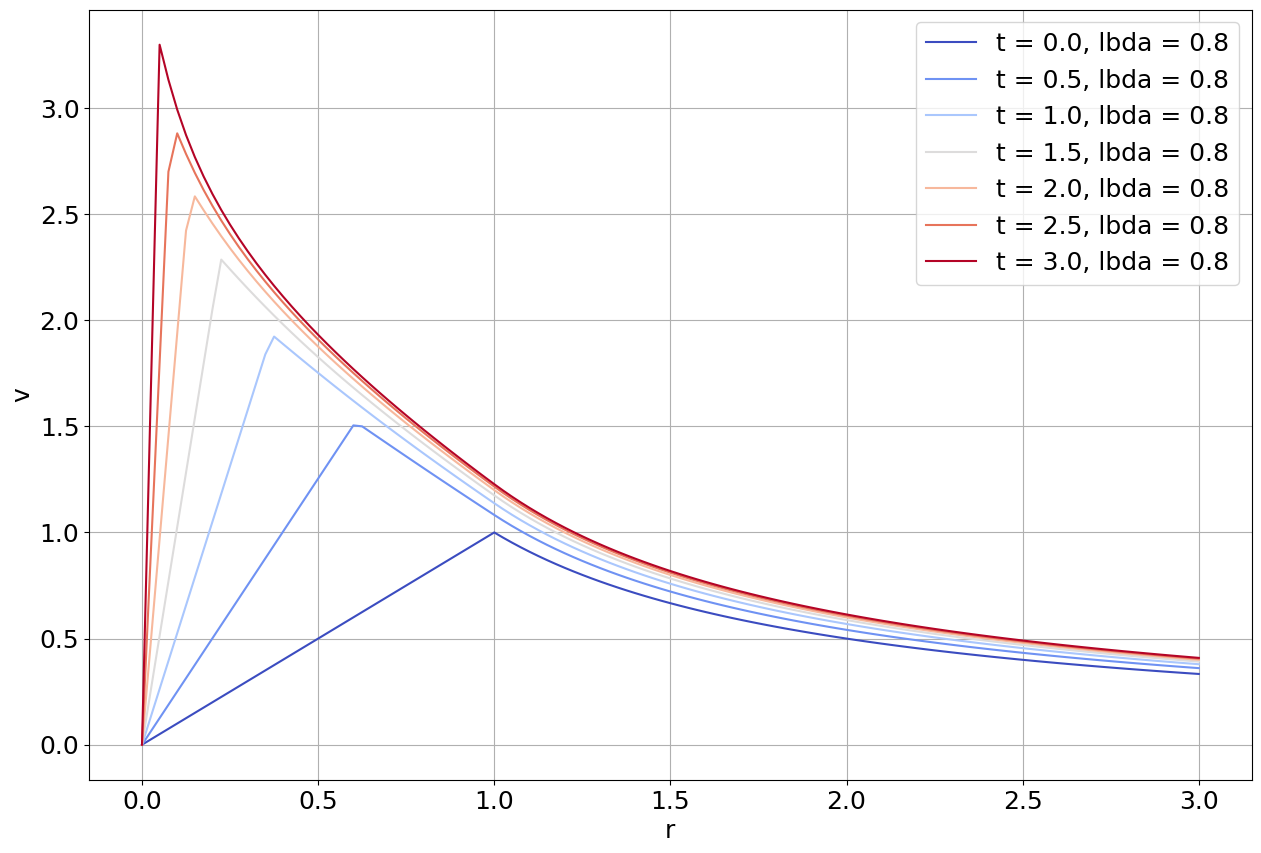

In [60]:
def V_rankine(r):
    v         = r * 0
    vin       = r
    vou       = 1 / r
    v[r < 1]  = vin[r < 1]
    v[r >= 1] = vou[r >= 1]
    return v

def V_holland(r):
    '''We assume that rho is constant and equals 1.15 kg.m-3'''
    # fcor  = coriolis(Lat)
    # rho   = 1.15
    # B     = (Vmax ** 2) * rho * np.e / (pn - pc)
    # A     = Rmax ** B
    A = B = rho = fcor = 1
    pn, pc = 2, 1
    
    V   = r * 0.
    V   = np.sqrt(A * B * (pn - pc) * np.exp((-1) * A / (r ** B)) / (rho * r ** B) + (r ** 2 * fcor ** 2) / 4) - (r * fcor / 2)
    return V

def v_k10(r, t, lbda=1.5, v0=V_rankine):
    v          = r * 0
    vin        = v0(r * np.exp(t)) * np.exp((1 - lbda) * t) + r * (1 - np.exp((2-lbda) * t)) / (lbda - 2)
    nr_term    = np.sqrt(1 + 2 * (np.log(r) + t))
    vnr        = nr_term * v0(nr_term) * np.exp(-lbda * t) / r + (lbda * r ** 2 - 2 * r ** lbda) / (lbda * r * (lbda - 2)) - np.exp(-lbda * t) / (lbda * r)
    ou_term    = np.sqrt(r ** 2 + 2 * t)
    vou        = ou_term * v0(ou_term) * np.exp(-lbda * t) / r + (1 - np.exp(-lbda * t)) / (lbda * r)
    
    # Declare final output
    bd         = np.exp(-t)
    v[r < bd]  = vin[r < bd]
    v[r >= bd] = vnr[r >= bd]
    v[r >= 1]  = vou[r >= 1]
    
    return v

rs     = np.linspace(0, 3, 121)
ts     = np.linspace(0, 3, 7)
colors = mpl.cm.coolwarm(np.linspace(0, 1, len(ts)))

lbda = 0.8

for i, t in enumerate(ts):
    plt.plot(rs, v_k10(rs, t=t, lbda=lbda, v0=V_rankine), label='t = {}, lbda = {}'.format(t, lbda), c=colors[i])
plt.grid();plt.legend()
plt.xlabel('r');plt.ylabel('v')

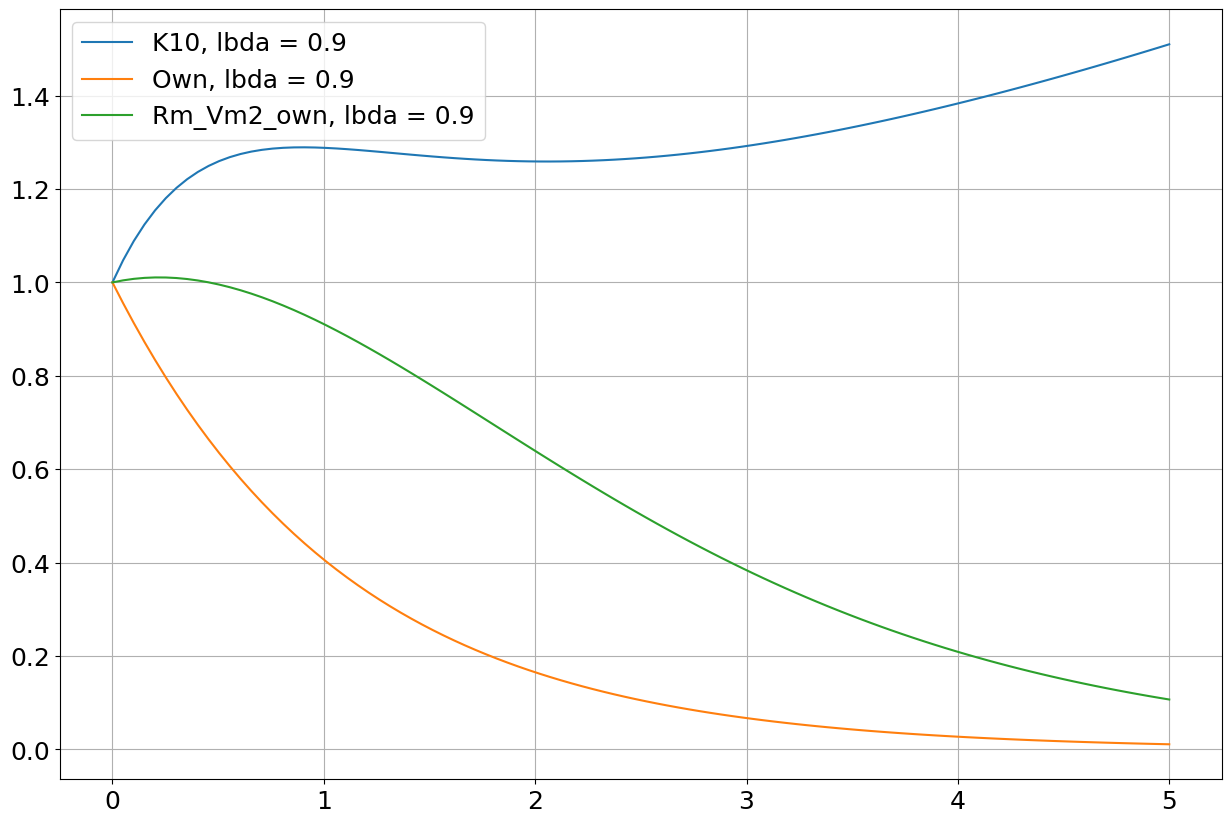

In [36]:
ts = np.linspace(0, 5, 100)
lbda = 0.9

def rmvm_k10(t, lbda=1.5, v0=1.):
    return v0 * np.exp(-lbda * t) + (np.exp(-2 * t) - np.exp((1 - lbda) * t)) / (lbda - 2)

def rmvm2_k10(t, lbda=1.5, v0=1.):
    return v0 * np.exp(-lbda * t) + (np.exp(-2 * t) - np.exp((1 - lbda) * t)) / (lbda - 2)

def rmvm_own(t, lbda=1.5, v0=1.):
    return v0 * np.exp(-lbda * t)

def rmvm2_own(t, lbda=1.5, beta=1.0, v0=1.):
    log_term = (2 / beta) * (np.log(1 + np.exp(beta * t)) - np.log(2))
    return v0 * np.exp(-lbda * t) * (1 + log_term)

plt.plot(ts, rmvm_k10(ts, lbda=lbda), label='K10, lbda = {}'.format(lbda))
plt.plot(ts, rmvm_own(ts, lbda=lbda), label='Own, lbda = {}'.format(lbda))
plt.plot(ts, rmvm2_own(ts, lbda=lbda, beta=1), label='Rm_Vm2_own, lbda = {}'.format(lbda))
plt.grid();plt.legend()

Text(0, 0.5, 'Rm and Vm')

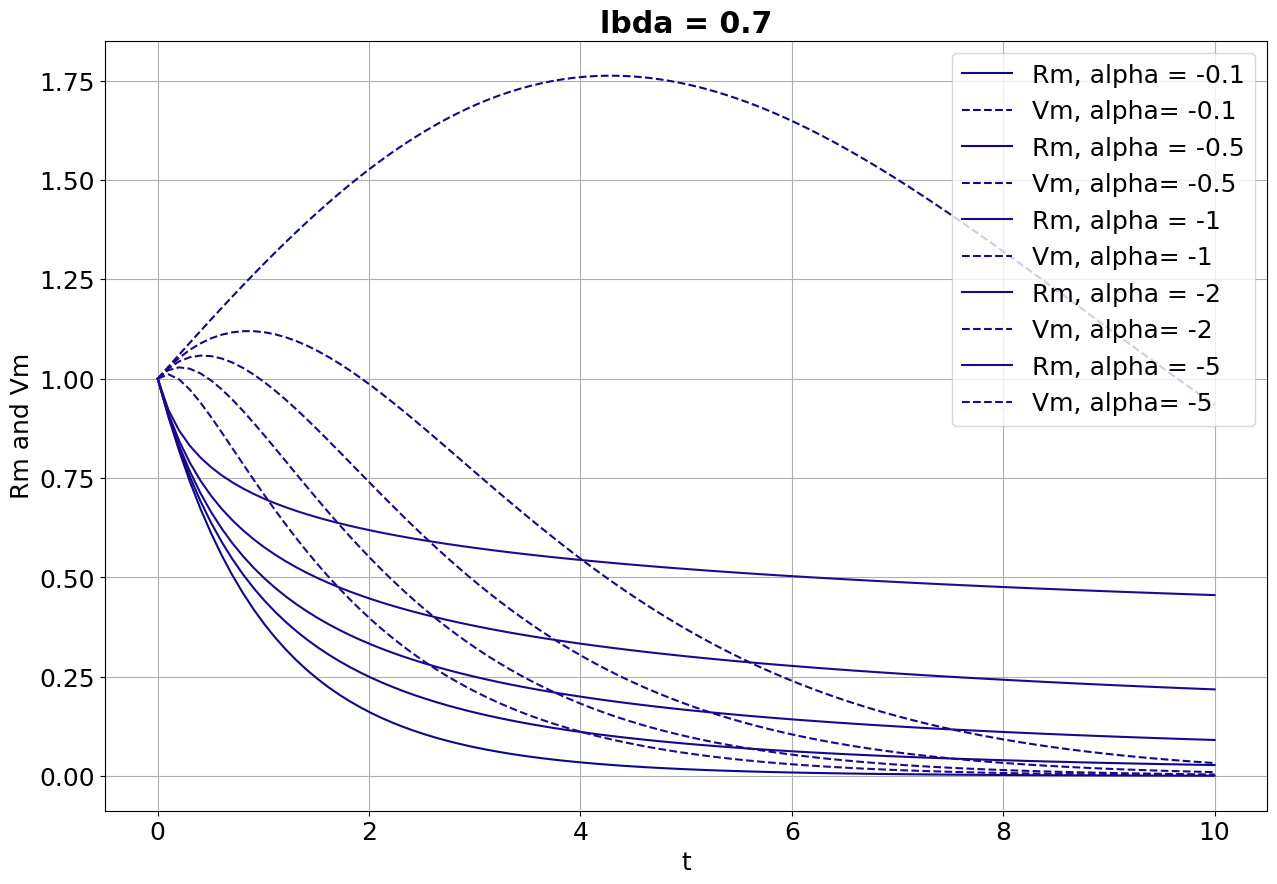

In [37]:
ts     = np.linspace(0, 10, 100)
colors = mpl.cm.plasma(np.linspace(0, 1, len(alphas)))
alphas =[-0.1, -0.5, -1, -2, -5]
lbda   = 0.7

def rm(t, alpha=-0.5, v0=1):
    return (1 - alpha * t) ** (1 / alpha)

def vm(t, lbda=1.5, alpha=0.5, v0=1):
    return v0 * np.exp(-lbda * t) / rm(t, alpha=alpha, v0=v0)

plt.title('lbda = {}'.format(lbda), weight='bold')
for i, alpha in enumerate(alphas):
    plt.plot(ts, rm(ts, alpha=alpha), label='Rm, alpha = {}'.format(alpha), c=colors[i])
    plt.plot(ts, vm(ts, lbda=lbda, alpha=alpha), label='Vm, alpha= {}'.format(alpha), linestyle='--', c=colors[i])
plt.legend()
plt.grid()
plt.xlabel('t');plt.ylabel('Rm and Vm')
# plt.savefig(PATHS['sav_dir'] + 'lbda{}_inner_core_model_alphas.eps'.format(lbda))

/tmp/ipykernel_7193/3039156316.py:4: RuntimeWarning: divide by zero encountered in divide
  vou       = 1 / r
/tmp/ipykernel_7193/3713369712.py:25: RuntimeWarning: divide by zero encountered in log
  nr_term    = np.sqrt(1 + 2 * (np.log(r) + t))
/tmp/ipykernel_7193/3713369712.py:25: RuntimeWarning: invalid value encountered in sqrt
  nr_term    = np.sqrt(1 + 2 * (np.log(r) + t))
/tmp/ipykernel_7193/3713369712.py:26: RuntimeWarning: invalid value encountered in divide
  vnr        = nr_term * v0(nr_term) * np.exp(-lbda * t) / r + (lbda * r ** 2 - 2 * r ** lbda) / (lbda * r * (lbda - 2)) - np.exp(-lbda * t) / (lbda * r)
/tmp/ipykernel_7193/3713369712.py:26: RuntimeWarning: divide by zero encountered in divide
  vnr        = nr_term * v0(nr_term) * np.exp(-lbda * t) / r + (lbda * r ** 2 - 2 * r ** lbda) / (lbda * r * (lbda - 2)) - np.exp(-lbda * t) / (lbda * r)
/tmp/ipykernel_7193/3713369712.py:28: RuntimeWarning: invalid value encountered in divide
  vou        = ou_term * v0(ou_term) * 

Text(0, 0.5, 'v')

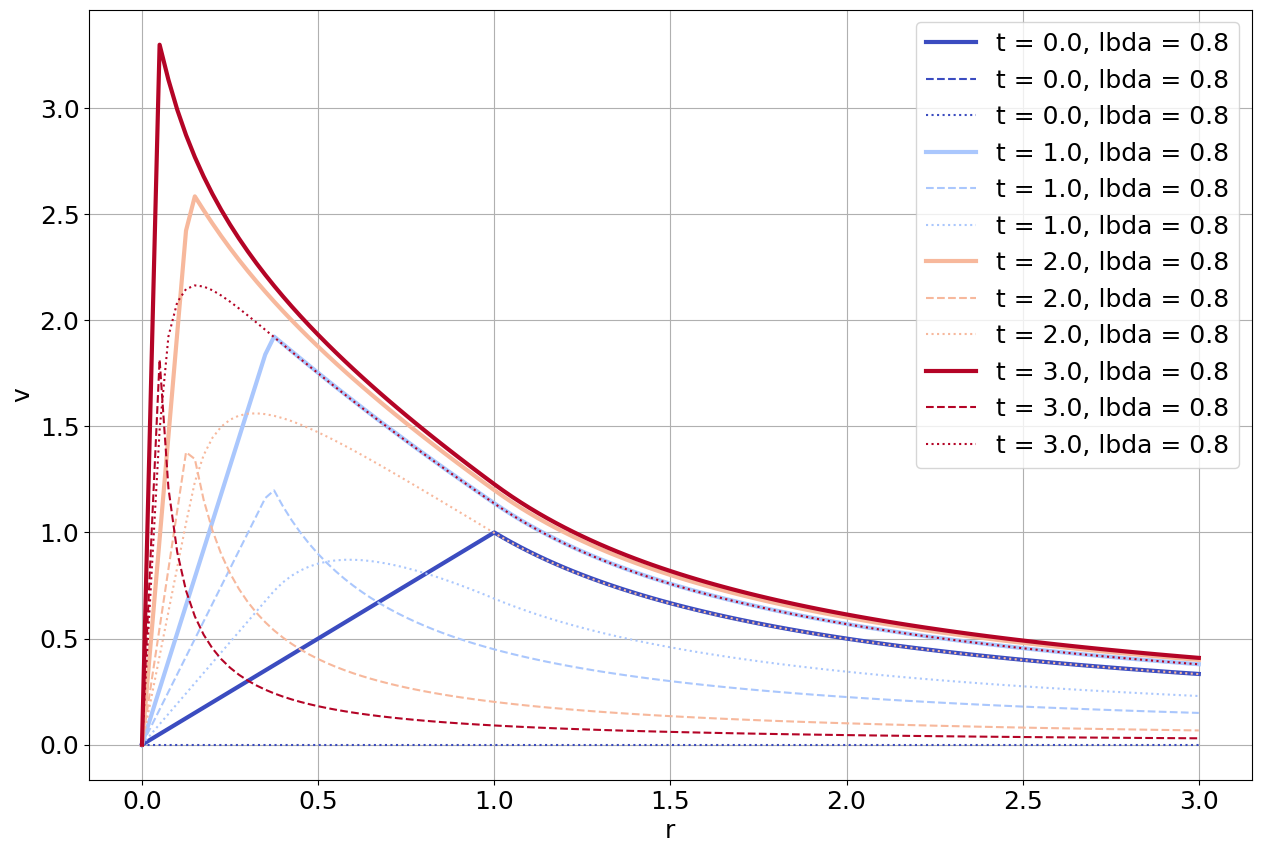

In [75]:
### SEPARATE INITIAL CONDITION AND REST

def v_k10_zero(r, t, lbda=1.5, v0=V_rankine):
    v          = r * 0
    vin        = r * (1 - np.exp((2-lbda) * t)) / (lbda - 2)
    vnr        = (lbda * r ** 2 - 2 * r ** lbda) / (lbda * r * (lbda - 2)) - np.exp(-lbda * t) / (lbda * r)
    vou        = (1 - np.exp(-lbda * t)) / (lbda * r)
    
    # Declare final output
    bd         = np.exp(-t)
    v[r < bd]  = vin[r < bd]
    v[r >= bd] = vnr[r >= bd]
    v[r >= 1]  = vou[r >= 1]
    
    return v

def v_k10_ini(r, t, lbda=1.5, v0=V_rankine):
    v          = r * 0
    vin        = v0(r * np.exp(t)) * np.exp((1 - lbda) * t) 
    nr_term    = np.sqrt(1 + 2 * (np.log(r) + t))
    vnr        = nr_term * v0(nr_term) * np.exp(-lbda * t) / r
    ou_term    = np.sqrt(r ** 2 + 2 * t)
    vou        = ou_term * v0(ou_term) * np.exp(-lbda * t) / r
    
    # Declare final output
    bd         = np.exp(-t)
    v[r < bd]  = vin[r < bd]
    v[r >= bd] = vnr[r >= bd]
    v[r >= 1]  = vou[r >= 1]
    
    return v

rs     = np.linspace(0, 3, 121)
ts     = np.linspace(0, 3, 4)
colors = mpl.cm.coolwarm(np.linspace(0, 1, len(ts)))

lbda = 0.8

for i, t in enumerate(ts):
    plt.plot(rs, v_k10(rs, t=t, lbda=lbda, v0=V_rankine), label='t = {}, lbda = {}'.format(t, lbda), c=colors[i], linewidth=3)
    plt.plot(rs, v_k10_ini(rs, t=t, lbda=lbda, v0=V_rankine), label='t = {}, lbda = {}'.format(t, lbda), c=colors[i], linestyle='--')      # Initial condition
    plt.plot(rs, v_k10_zero(rs, t=t, lbda=lbda, v0=V_rankine), label='t = {}, lbda = {}'.format(t, lbda), c=colors[i], linestyle='dotted') # zero initial condition
plt.grid();plt.legend()
plt.xlabel('r');plt.ylabel('v')